# Develop $\xi_{gg}$:

## Understand $\xi_{hh}$:
1. Loading emulators
2. Predict $\xi_{hh}(r)$ on $(M_{th1}, M_{th2})$ grids for a new cosmology:

In [ ]:
from gal_goku import emu_cosmo_not_combined
import importlib
importlib.reload(emu_cosmo_not_combined)
import numpy as np
import time

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
emu = emu_cosmo_not_combined.XiEmulator(dat_dir=data_dir, loggin_level='ERROR')
mass_pair = (11.4, 11.4)

start = time.time()
cosmo = (emu.cosmo_min + emu.cosmo_max)/2.0
xi_pred, var_pred = emu.predict_xi(mass_pair[0], mass_pair[1], cosmo[:,np.newaxis])
end = time.time()
print(f'Elapsed time for prediction: seconds = {(end-start):.1f}')

2025-04-30 11:59:21.803651: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 11:59:21.806825: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 11:59:21.816734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746032361.832789  544250 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746032361.837760  544250 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-30 11:59:21.855012: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
emu.rbins.size

26

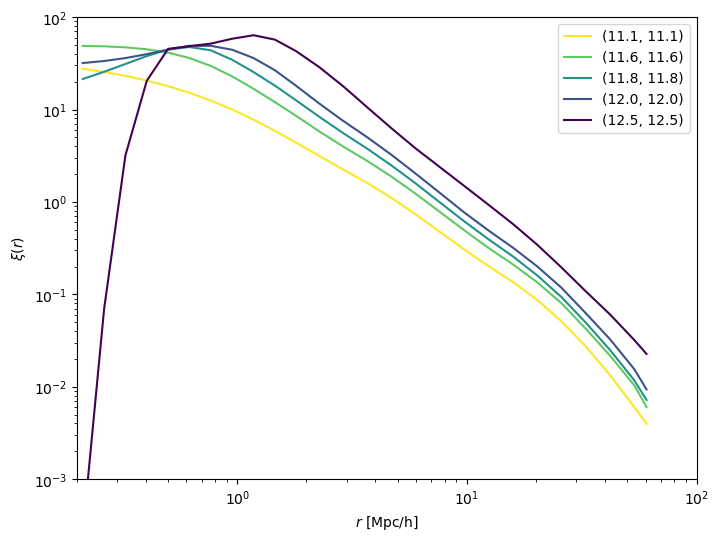

In [10]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(8, 6))
mpair = [(11.1, 11.1), (11.6, 11.6), (11.8, 11.8),  (12.0, 12.0), (12.5, 12.5)]

viridis = plt.get_cmap('viridis', len(mpair)).reversed()
for i in range(len(mpair)):
    cosmo = (emu.cosmo_min + emu.cosmo_max)/2.0
    xi_pred, var_pred = emu.predict_xi(mpair[i][0], mpair[i][1], cosmo[:,np.newaxis])
    ind = np.where((emu.mass_pairs[:, 0] == mpair[i][0]) * (emu.mass_pairs[:, 1] == mpair[i][1]))[0]
    ax.plot(emu.rbins, 10**xi_pred.squeeze(), label=f'{mpair[i]}', color=viridis(i / len(mpair)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(2e-1, 1e2)
ax.set_ylim(1e-3, 1e2)
ax.set_xlabel(r'$r$ [Mpc/h]')
ax.set_ylabel(r'$\xi(r)$')
ax.legend()

2025-04-06 20:38:58.713607: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-06 20:38:58.716804: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-06 20:38:58.726682: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743989938.742782  123167 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743989938.747575  123167 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-06 20:38:58.764979: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Text(0.5, 1.0, 'mpair = [11.6 11.6]')

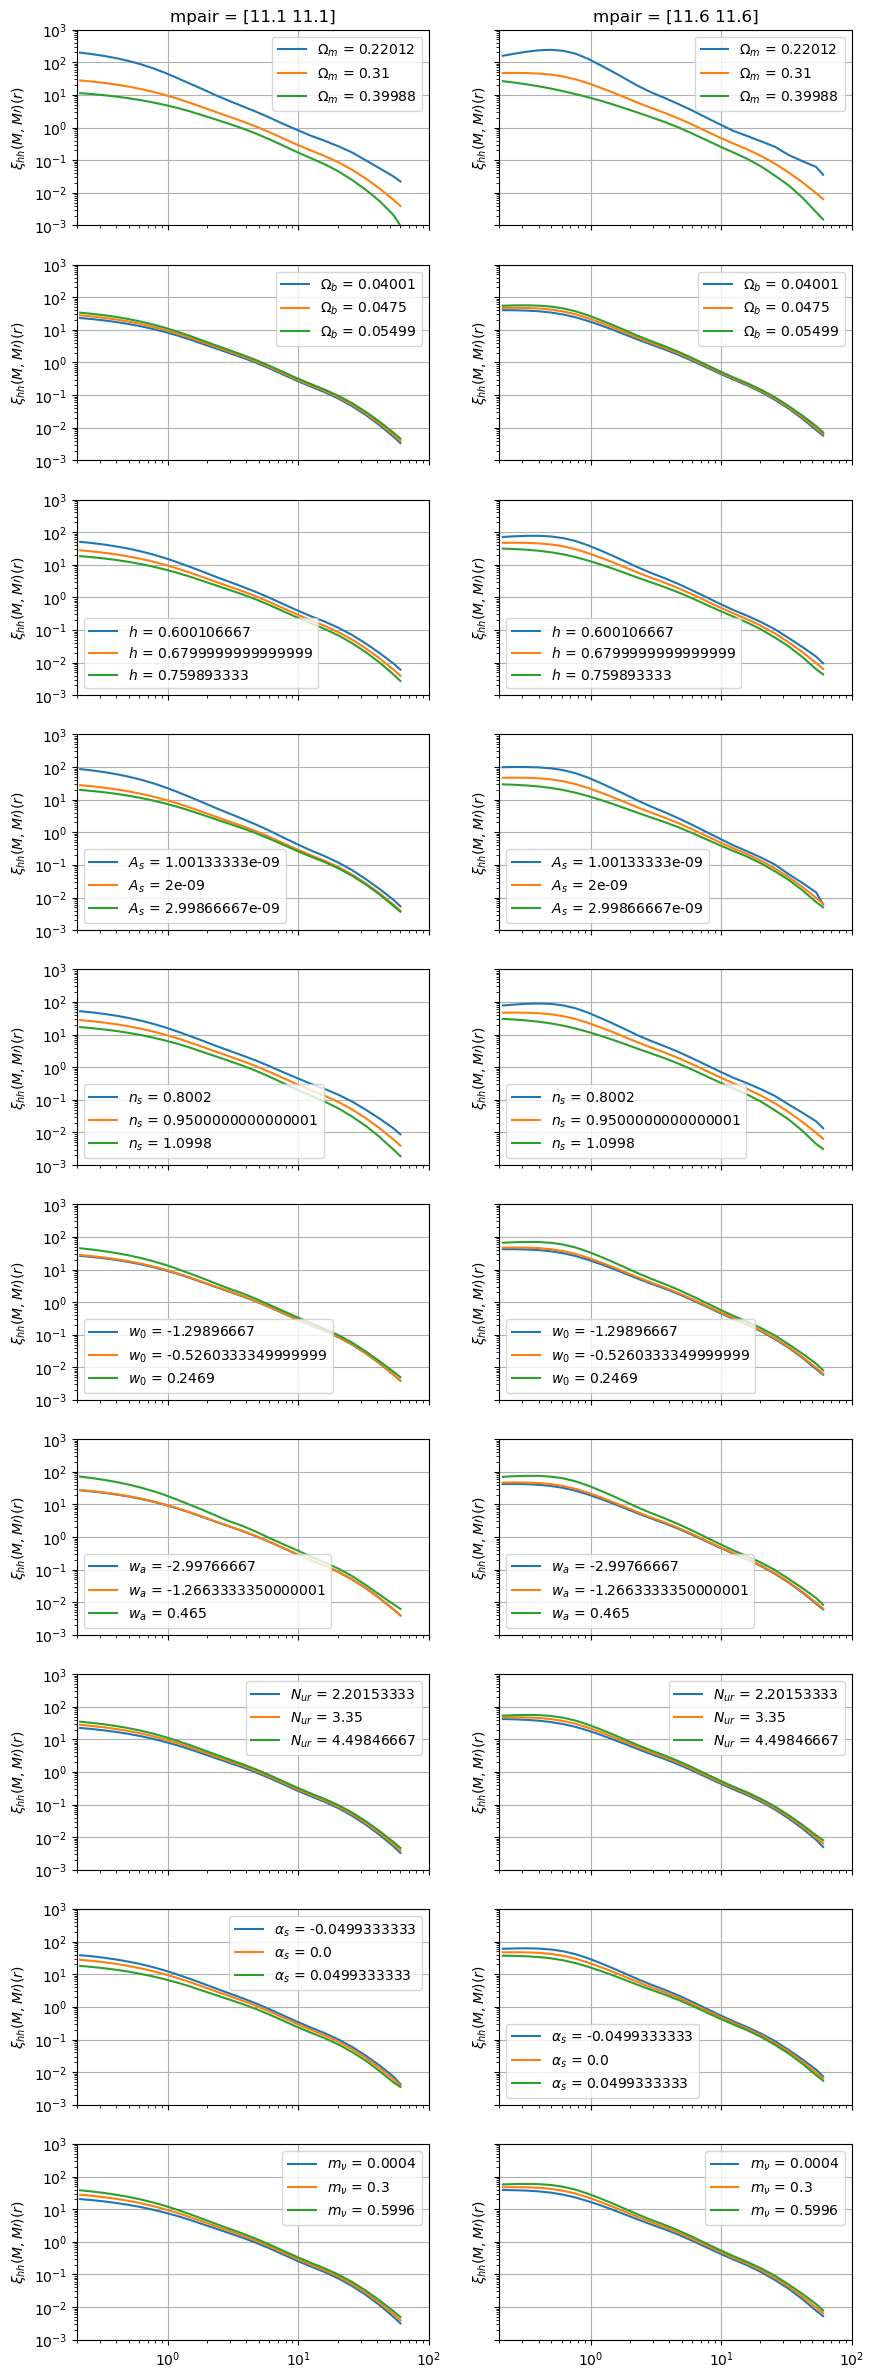

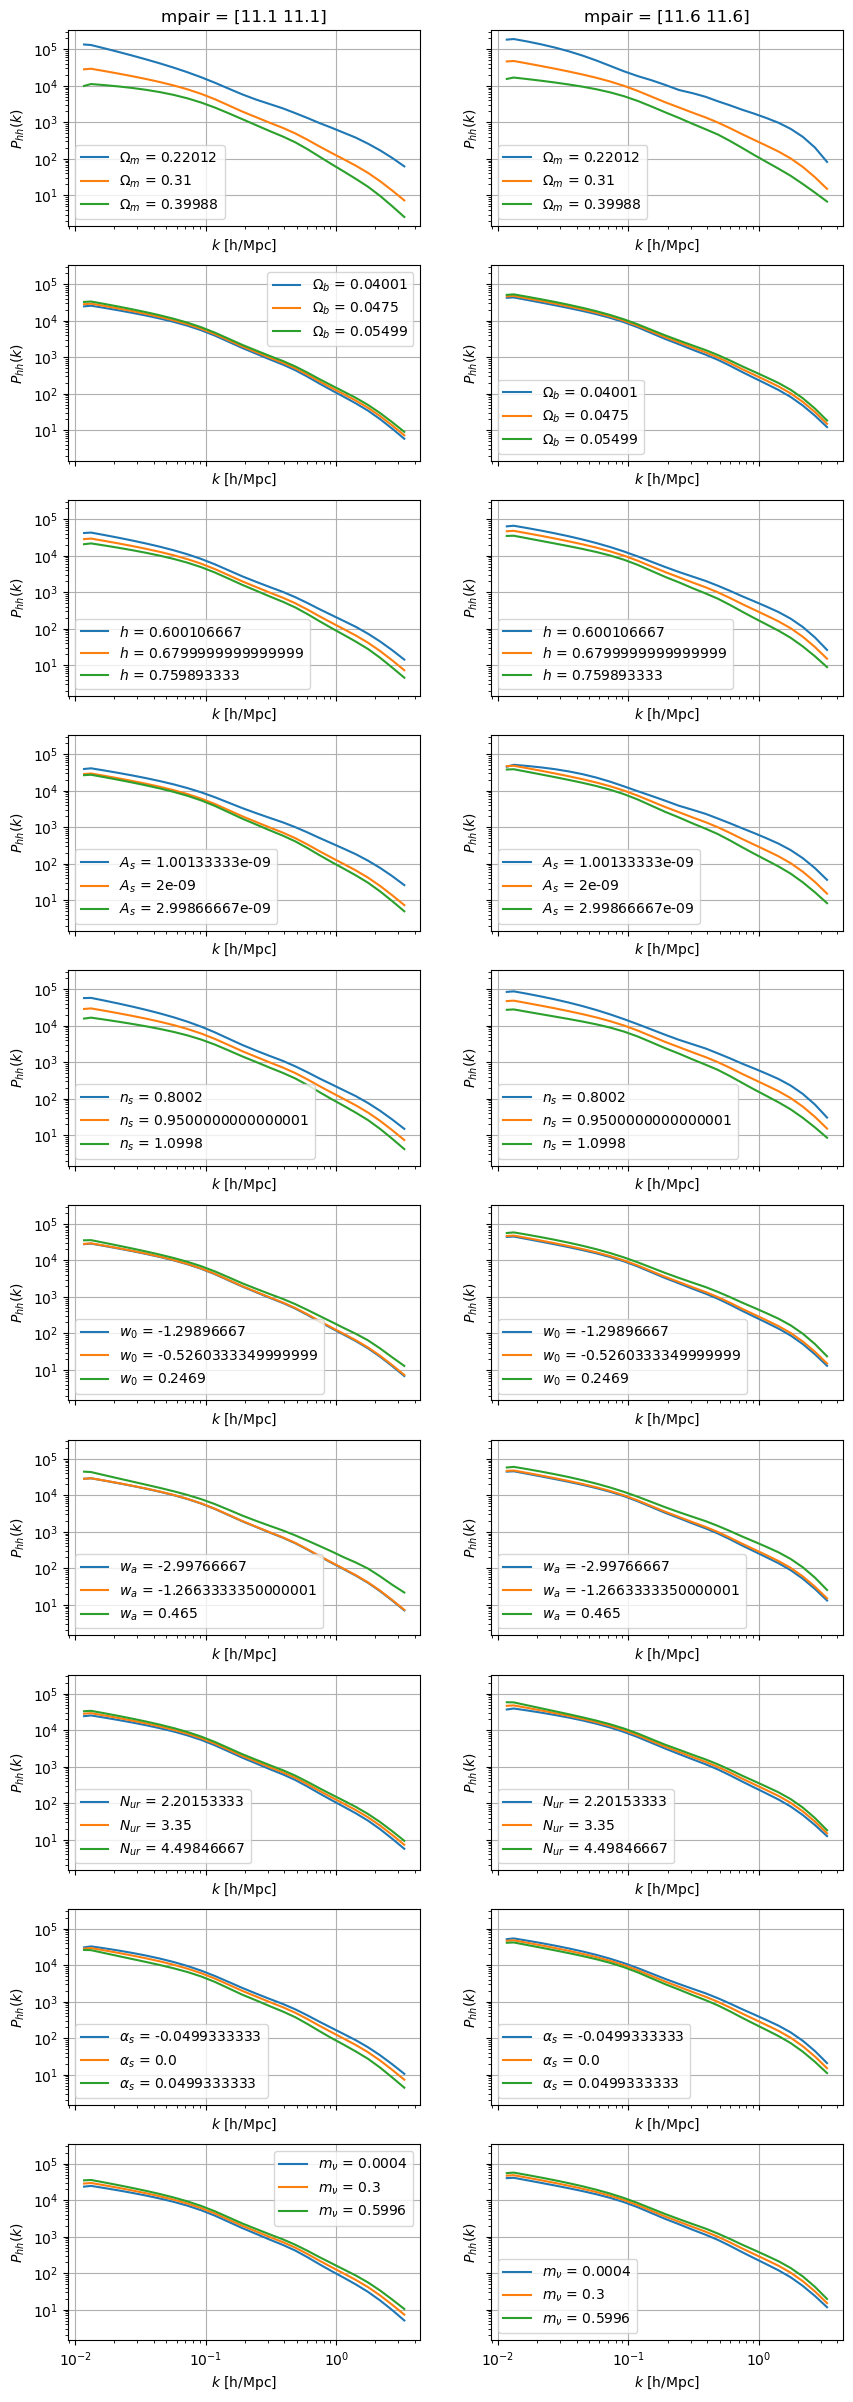

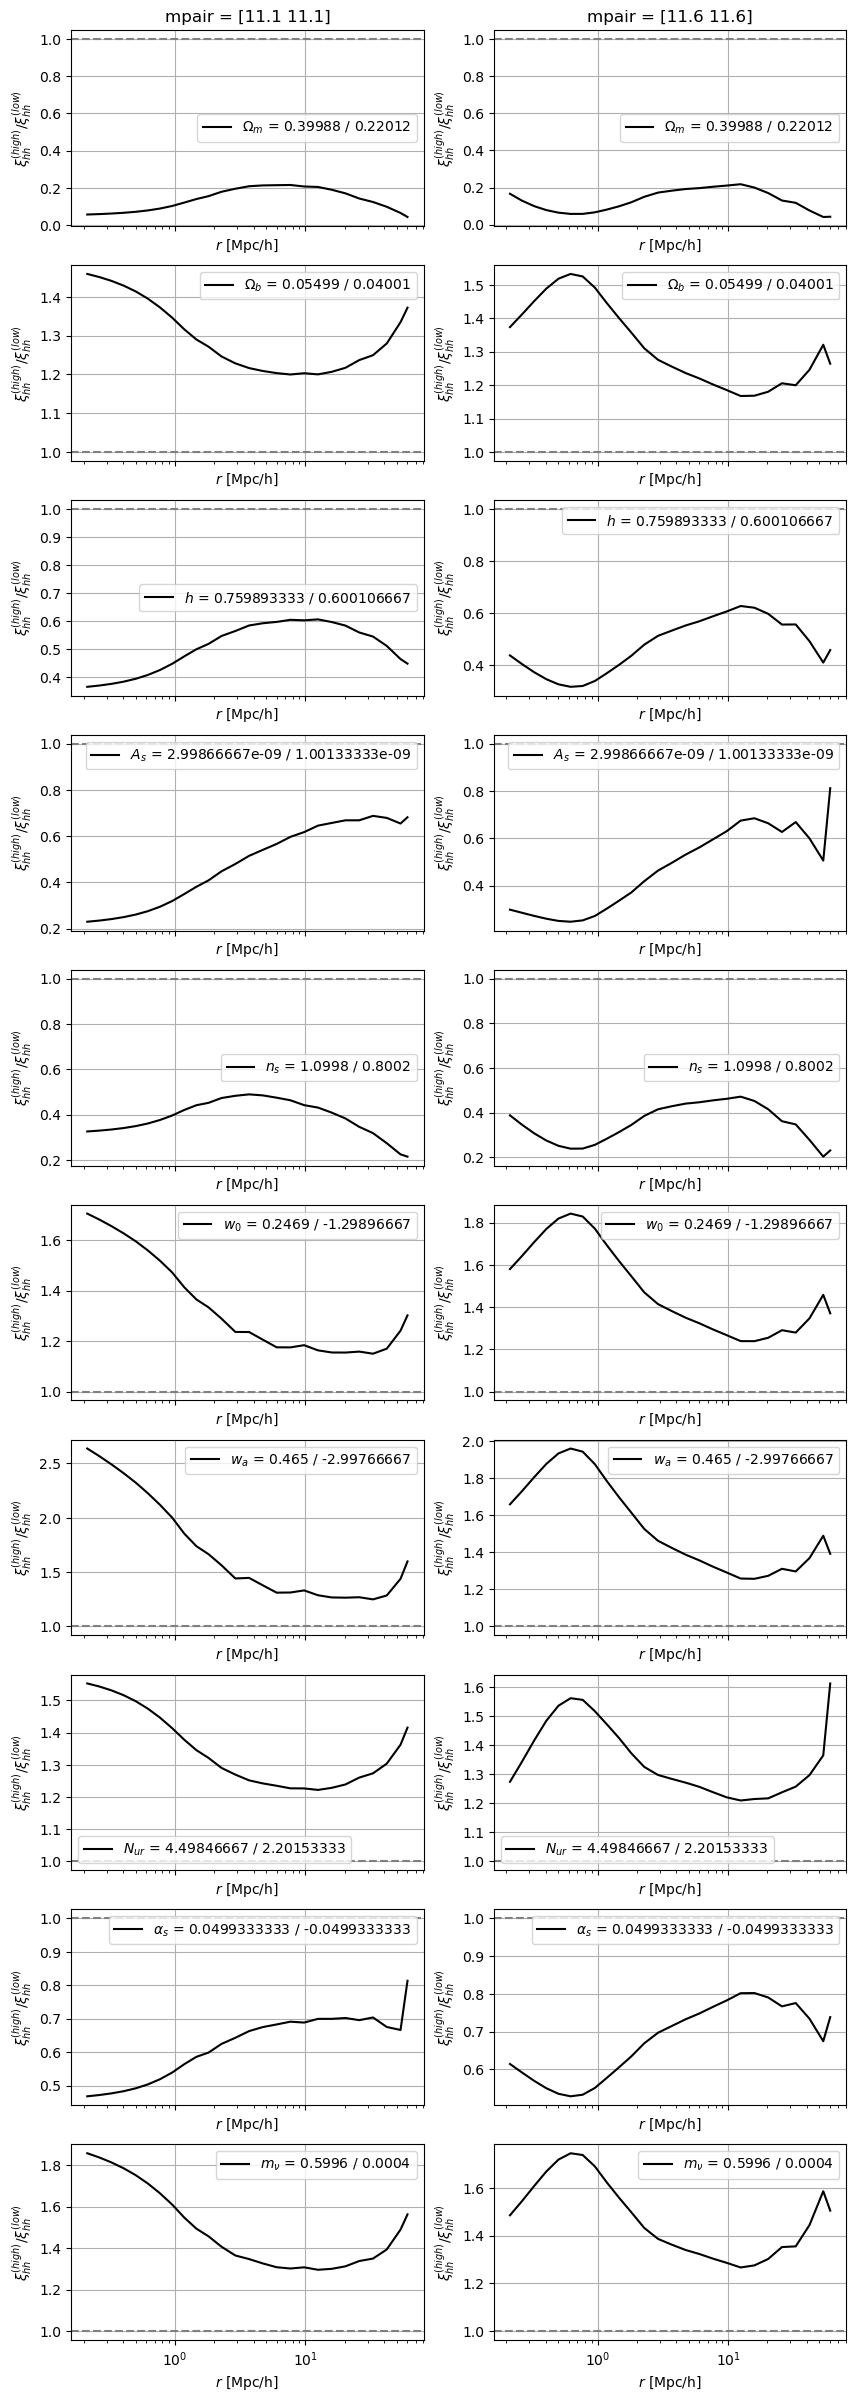

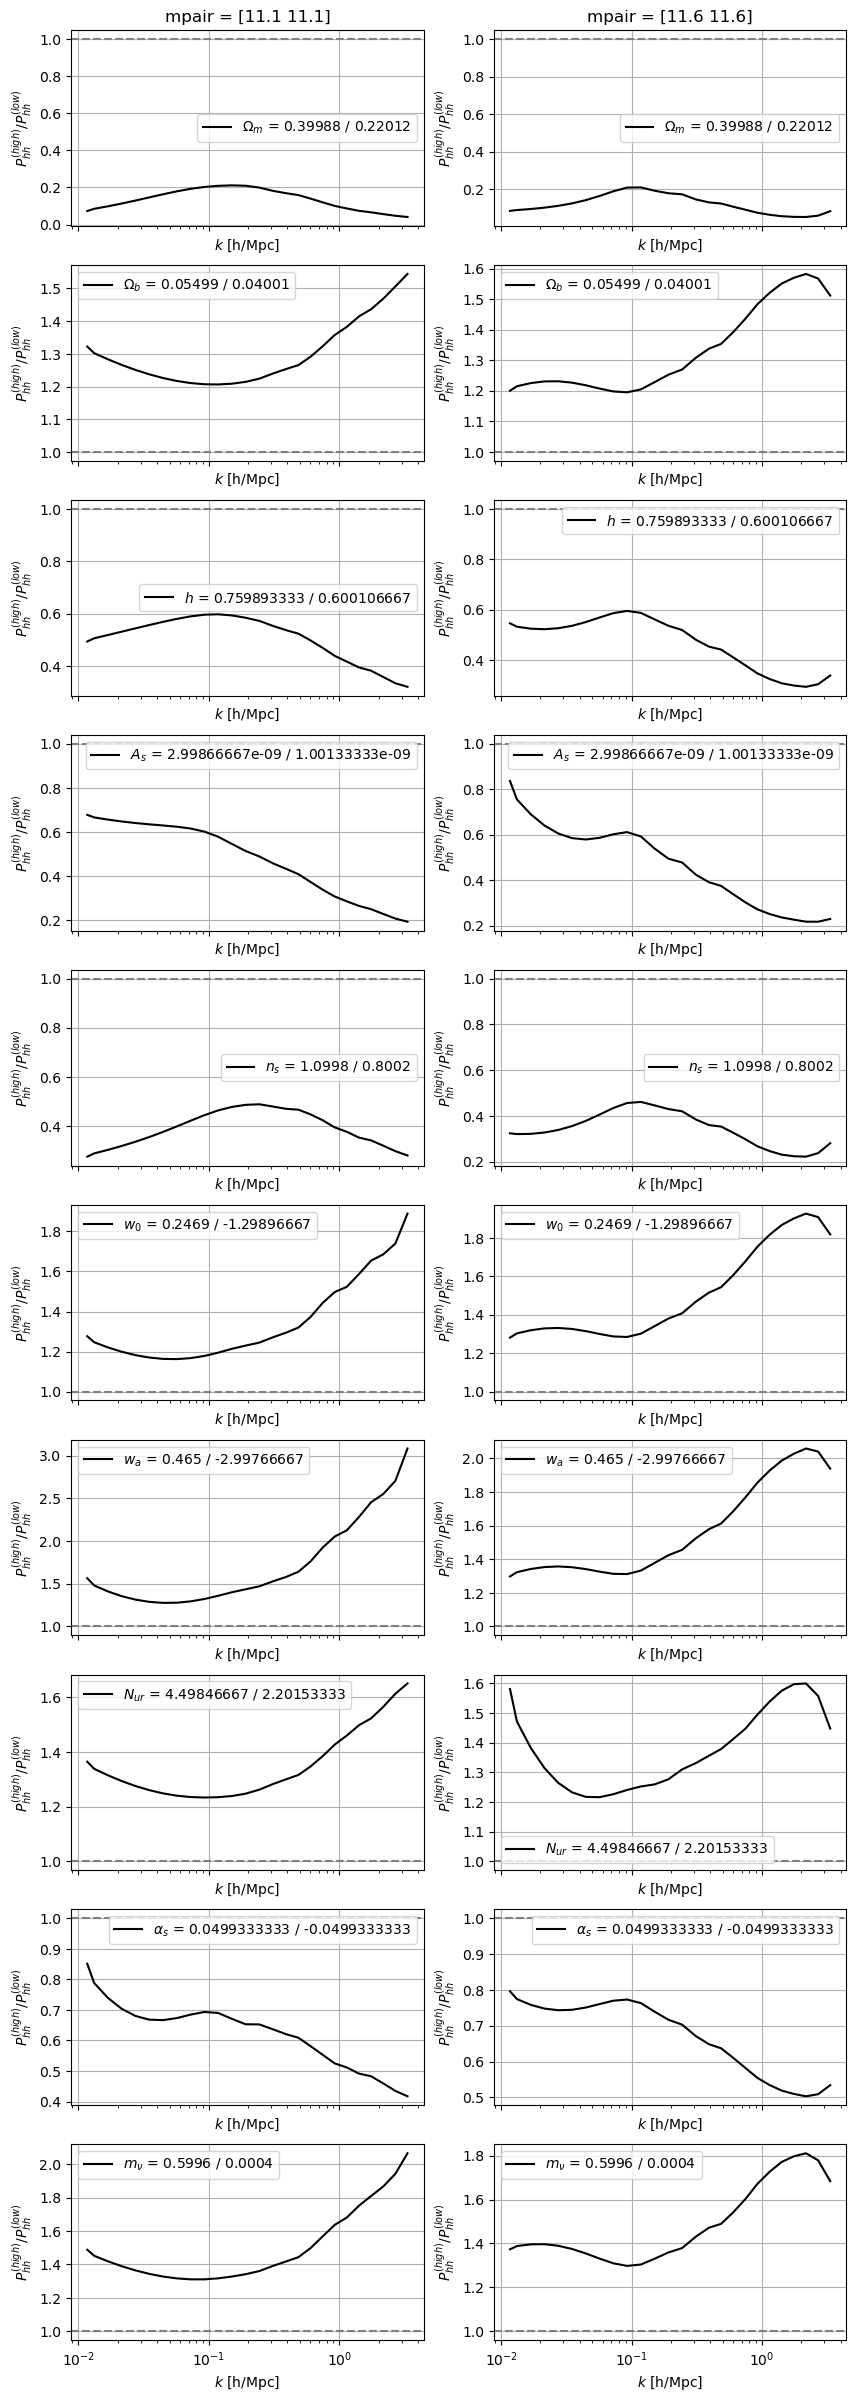

In [ ]:
from gal_goku import emu_cosmo_not_combined
import importlib
importlib.reload(emu_cosmo_not_combined)
import numpy as np
import matplotlib.pyplot as plt
import mcfit

params=['omega0', 'omegab', 'hubble', 'scalar_amp', 'ns', 
        'w0_fld', 'wa_fld', 'N_ur', 'alpha_s', 
        'm_nu']
latex_labels = {'omega0': r'$\Omega_m$', 'omegab': r'$\Omega_b$', 
                             'hubble': r'$h$', 'scalar_amp': r'$A_s$', 'ns': r'$n_s$', 
                             'w0_fld': r'$w_0$', 'wa_fld': r'$w_a$', 'N_ur': r'$N_{ur}$', 
                             'alpha_s': r'$\alpha_s$', 'm_nu': r'$m_{\nu}$'}

order_ratio = [(1,2), (2,1), (1,2), (2,1)]
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
emu = emu_cosmo_not_combined.XiEmulator(dat_dir=data_dir, loggin_level='ERROR')

cosmo_mid = (emu.cosmo_min + emu.cosmo_max)/2.0
all_mass_pairs = np.array([(11.1, 11.1), (11.6, 11.6)])


fig, axes = plt.subplots(len(cosmo_mid), 2, figsize=(10, 3 * len(cosmo_mid)), sharex=True, sharey=True)
fig_pk, axes_pk = plt.subplots(len(cosmo_mid), 2, figsize=(10, 3 * len(cosmo_mid)), sharex=True, sharey=True)
fig_ratio, axes_ratio = plt.subplots(len(cosmo_mid), 2, figsize=(10, 3 * len(cosmo_mid)), sharex=True, sharey=False)
fig_pk_ratio, axes_pk_ratio = plt.subplots(len(cosmo_mid), 2, figsize=(10, 3 * len(cosmo_mid)), sharex=True, sharey=False)

for m in range(len(all_mass_pairs)):
    for i in range(len(cosmo_mid)):
        cosmo_low = cosmo_mid.copy()
        cosmo_low[i] = emu.cosmo_min[i]
        cosmo_high = cosmo_mid.copy()
        cosmo_high[i] = emu.cosmo_max[i]
        all_cosmos = np.array([cosmo_low, cosmo_mid, cosmo_high])
        
        xi_preds = []
        phhs = []
        for c in range(len(all_cosmos)):
            xi_pred, var_pred = emu.predict_xi(all_mass_pairs[m][0], all_mass_pairs[m][1], all_cosmos[c][:, np.newaxis])
            k, phh = mcfit.xi2P(emu.rbins, l=0, lowring=True)(xi_pred, extrap=True)
            xi_preds.append(xi_pred.squeeze())
            phhs.append(phh.squeeze())
            #axes[i, m].errorbar(emu.rbins, xi_pred.squeeze(), yerr=np.sqrt(var_pred.squeeze()), 
            #                    label=rf'{latex_labels[params[i]]} = {all_cosmos[c][i]}', color=f'C{c}', capsize=3, alpha=0.7)
            axes[i, m].plot(emu.rbins, xi_pred.squeeze(), label=rf'{latex_labels[params[i]]} = {all_cosmos[c][i]}', color=f'C{c}')
            axes_pk[i, m].plot(k, phh.squeeze(), label=rf'{latex_labels[params[i]]} = {all_cosmos[c][i]}', color=f'C{c}')
            axes[i, m].set_xscale('log')
            axes[i, m].set_yscale('log')
            axes[i, m].set_xlim(2e-1, 1e2)
            axes[i, m].set_ylim(1e-3, 1e3)
            axes[i, m].set_ylabel(r'$\xi_{hh}(M, M\prime)(r)$')
            axes[i,m].grid(True)
            axes[i,m].legend()
            axes_pk[i,m].set_ylabel(r'$P_{hh}(k)$')
            axes_pk[i,m].set_xlabel(r'$k$ [h/Mpc]')
            axes_pk[i, m].set_xscale('log')
            axes_pk[i, m].set_yscale('log')
            axes_pk[i, m].grid(True)
            axes_pk[i, m].legend()
        axes[0, m].set_title(f'mpair = {all_mass_pairs[m]}')
        axes_pk[0, m].set_title(f'mpair = {all_mass_pairs[m]}')
        
        # Plot ratio for xi_pred
        ratio_xi = xi_preds[2] / xi_preds[0]
        label_ratio = rf'{latex_labels[params[i]]} = {all_cosmos[2][i]} / {all_cosmos[0][i]}'
        axes_ratio[i, m].plot(emu.rbins, ratio_xi, label=label_ratio, color='black')
        axes_ratio[i, m].axhline(1, color='gray', linestyle='--')
        axes_ratio[i, m].set_xscale('log')
        axes_ratio[i, m].set_xlabel(r'$r$ [Mpc/h]')
        axes_ratio[i, m].set_ylabel(r'$\xi_{hh}^{(high)}/\xi_{hh}^{(low)}$')
        axes_ratio[i, m].grid(True)
        axes_ratio[i, m].legend()
        
        # Plot ratio for phh
        ratio_phh = phhs[2] / phhs[0]
        axes_pk_ratio[i, m].plot(k, ratio_phh, label=label_ratio, color='black')
        axes_pk_ratio[i, m].axhline(1, color='gray', linestyle='--')
        axes_pk_ratio[i, m].set_xscale('log')
        axes_pk_ratio[i, m].set_xlabel(r'$k$ [h/Mpc]')
        axes_pk_ratio[i, m].set_ylabel(r'$P_{hh}^{(high)}/P_{hh}^{(low)}$')
        axes_pk_ratio[i, m].grid(True)
        axes_pk_ratio[i, m].legend()

axes_ratio[0, 0].set_title(f'mpair = {all_mass_pairs[0]}')
axes_pk_ratio[0, 0].set_title(f'mpair = {all_mass_pairs[0]}')
axes_ratio[0, 1].set_title(f'mpair = {all_mass_pairs[1]}')
axes_pk_ratio[0, 1].set_title(f'mpair = {all_mass_pairs[1]}')


## Check cosmo sensitivity on the sims:

/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/summary_stats.py:591: RuntimeWarning: invalid value encountered in log10
  log_corr = np.log10(self.xi[:,ind_m,ind_r]).squeeze()


[[ 2.74840000e-01  4.45700000e-02  6.49920000e-01  1.60266667e-09
   8.90600000e-01 -8.35000000e-01 -1.93600000e+00  2.89306667e+00
  -2.02666667e-02  1.80000000e-01]
 [ 3.10000000e-01  4.74400000e-02  6.78933333e-01  2.01333333e-09
   9.50800000e-01 -5.40500000e-01 -1.25233333e+00  3.34540000e+00
  -2.66666667e-04  2.97200000e-01]
 [ 3.47440000e-01  5.05300000e-02  7.12426667e-01  2.39733333e-09
   1.00920000e+00 -2.31533333e-01 -6.06000000e-01  3.80386667e+00
   2.01333333e-02  4.23200000e-01]]


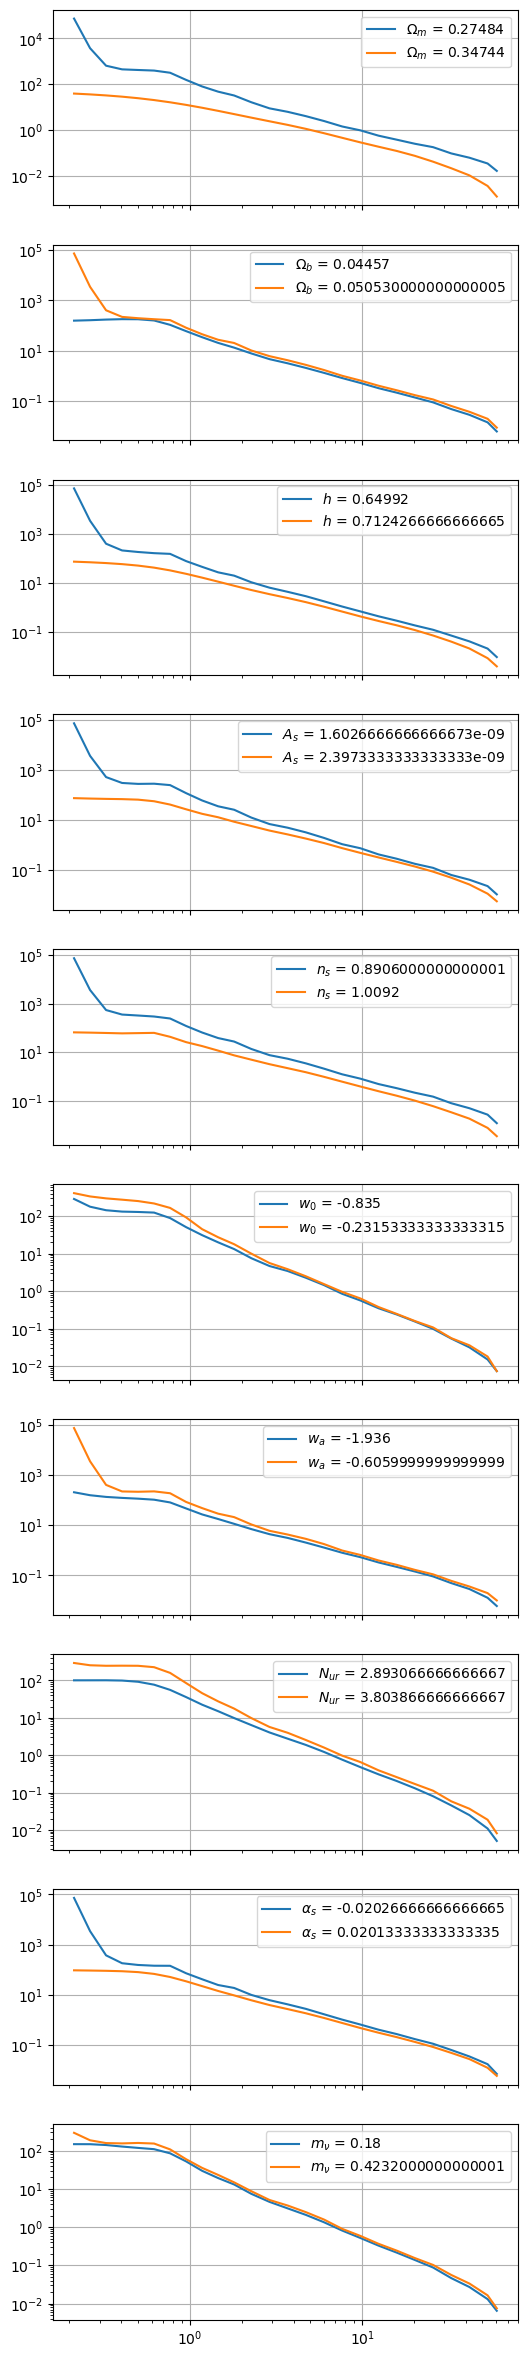

In [16]:
from matplotlib import pyplot as plt
from gal_goku import summary_stats
import numpy as np

params=['omega0', 'omegab', 'hubble', 'scalar_amp', 'ns', 
        'w0_fld', 'wa_fld', 'N_ur', 'alpha_s', 
        'm_nu']
latex_labels = {'omega0': r'$\Omega_m$', 'omegab': r'$\Omega_b$', 
                             'hubble': r'$h$', 'scalar_amp': r'$A_s$', 'ns': r'$n_s$', 
                             'w0_fld': r'$w_0$', 'wa_fld': r'$w_a$', 'N_ur': r'$N_{ur}$', 
                             'alpha_s': r'$\alpha_s$', 'm_nu': r'$m_{\nu}$'}

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
mass_pair = (11.4, 11.4)
xi = summary_stats.Xi(data_dir=data_dir, fid='L2',  logging_level='ERROR')
rbins, _, corr, bad_sims_mask = xi.spline_nan_interp(mass_pair, rcut=(0.2,61))
cosmos = xi.get_params_array()[~bad_sims_mask]
corr = corr[~bad_sims_mask]
percent = np.percentile(cosmos, [30, 50, 70], axis=0)
print(percent)
fig, ax = plt.subplots(10, 1, figsize=(6, 30), sharex=True)
for i in range(10):
    ind = np.where(cosmos[:,i] <= percent[0,i])[0]
    xi_low = np.mean(10**corr[ind,:], axis=0)
    ind = np.where(cosmos[:,i] >= percent[2,i])[0]
    xi_high = np.mean(10**corr[ind,:], axis=0)

    
    ax[i].plot(rbins, xi_low, label=rf'{latex_labels[params[i]]} = {percent[0,i]}')
    ax[i].plot(rbins, xi_high, label=rf'{latex_labels[params[i]]} = {percent[2,i]}')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].legend()
    ax[i].grid(True)


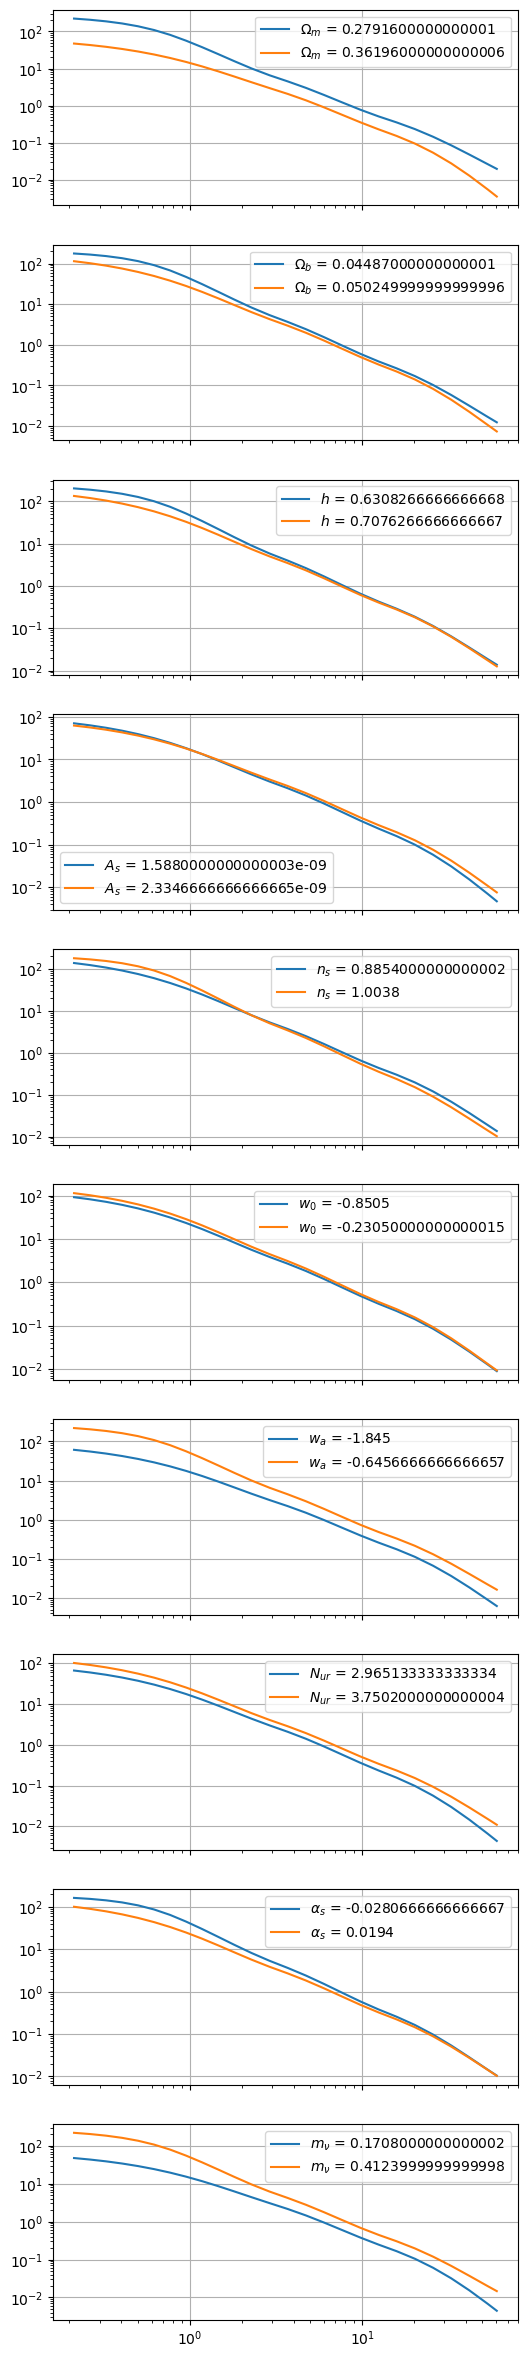

In [17]:
from matplotlib import pyplot as plt
from gal_goku import summary_stats
import numpy as np

params=['omega0', 'omegab', 'hubble', 'scalar_amp', 'ns', 
        'w0_fld', 'wa_fld', 'N_ur', 'alpha_s', 
        'm_nu']
latex_labels = {'omega0': r'$\Omega_m$', 'omegab': r'$\Omega_b$', 
                             'hubble': r'$h$', 'scalar_amp': r'$A_s$', 'ns': r'$n_s$', 
                             'w0_fld': r'$w_0$', 'wa_fld': r'$w_a$', 'N_ur': r'$N_{ur}$', 
                             'alpha_s': r'$\alpha_s$', 'm_nu': r'$m_{\nu}$'}

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
mass_pair = (11.4, 11.4)
xi = summary_stats.Xi(data_dir=data_dir, fid='HF', narrow=False,  logging_level='ERROR')
rbins, _, corr, bad_sims_mask = xi.spline_nan_interp(mass_pair, rcut=(0.2,61))
cosmos = xi.get_params_array()[~bad_sims_mask]
corr = corr[~bad_sims_mask]
percent = np.percentile(cosmos, [30, 50, 70], axis=0)
fig, ax = plt.subplots(10, 1, figsize=(6, 30), sharex=True)
for i in range(10):
    ind = np.where(cosmos[:,i] <= percent[0,i])[0]
    xi_low = np.mean(10**corr[ind,:], axis=0)
    ind = np.where(cosmos[:,i] >= percent[2,i])[0]
    xi_high = np.mean(10**corr[ind,:], axis=0)

    
    ax[i].plot(rbins, xi_low, label=rf'{latex_labels[params[i]]} = {percent[0,i]}')
    ax[i].plot(rbins, xi_high, label=rf'{latex_labels[params[i]]} = {percent[2,i]}')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].legend()
    ax[i].grid(True)


In [1]:
from matplotlib import pyplot as plt
from gal_goku import summary_stats
import numpy as np

params=['omega0', 'omegab', 'hubble', 'scalar_amp', 'ns', 
        'w0_fld', 'wa_fld', 'N_ur', 'alpha_s', 
        'm_nu']
latex_labels = {'omega0': r'$\Omega_m$', 'omegab': r'$\Omega_b$', 
                             'hubble': r'$h$', 'scalar_amp': r'$A_s$', 'ns': r'$n_s$', 
                             'w0_fld': r'$w_0$', 'wa_fld': r'$w_a$', 'N_ur': r'$N_{ur}$', 
                             'alpha_s': r'$\alpha_s$', 'm_nu': r'$m_{\nu}$'}

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
mass_pair = (11.4, 11.4)
xi = summary_stats.Xi(data_dir=data_dir, fid='L2',  logging_level='ERROR')
rbins, _, corr, bad_sims_mask = xi.spline_nan_interp(mass_pair, rcut=(0.2,61))
cosmos = xi.get_params_array()[~bad_sims_mask]
corr = corr[~bad_sims_mask]

2025-04-07 10:48:34.258505: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 10:48:34.261308: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 10:48:34.270779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744040914.286573  149611 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744040914.291346  149611 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 10:48:34.308016: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [11]:
cosmos[-2]

array([ 3.17080000e-01,  5.13300000e-02,  7.51360000e-01,  1.07066667e-09,
        9.41800000e-01, -4.49566667e-01, -5.76666667e-02,  2.60326667e+00,
       -3.33333333e-04,  1.04400000e-01])

In [10]:
xi.sim_tags[-2]

'compressed_10p_Box250_Part750_0562'

## linear power:

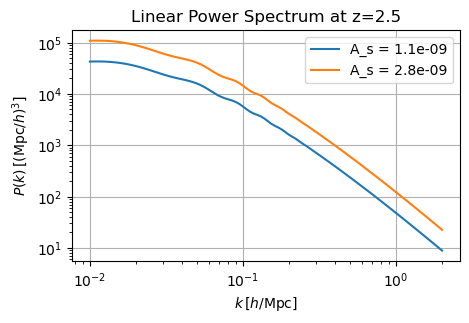

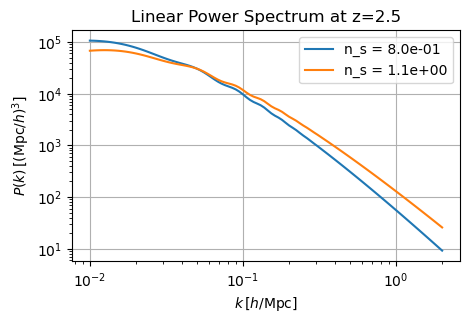

In [16]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# Define cosmological parameters
params = {
    'output': 'mPk',
    'P_k_max_h/Mpc': 10,
    'z_pk': '2.5',
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'h': 0.67,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
}

Aps = [1.1e-9, 2.8e-9]
fig ,ax = plt.subplots(1, 1, figsize=(5, 3))
for i in range(2):
    params_new = params.copy()
    params_new['A_s'] = Aps[i]
    # Initialize CLASS
    cosmo = Class()
    cosmo.set(params_new)
    cosmo.compute()


    # Get P(k) at z=0
    k_vals = np.logspace(-2, np.log10(2), 100)  # in h/Mpc
    pk_vals = [cosmo.pk(k, 0) for k in k_vals]  # z=0

    # Plot
    ax.loglog(k_vals, pk_vals, label=f'A_s = {Aps[i]:.1e}')
    ax.set_xlabel(r'$k \, [h/\mathrm{Mpc}]$')
    ax.set_ylabel(r'$P(k) \, [(\mathrm{Mpc}/h)^3]$')
    ax.set_title('Linear Power Spectrum at z=2.5')
    ax.grid(True)
    ax.legend()

    # Clean up
    cosmo.struct_cleanup()
    cosmo.empty()

# Define cosmological parameters
params = {
    'output': 'mPk',
    'P_k_max_h/Mpc': 10,
    'z_pk': '2.5',
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'h': 0.67,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
}

ns = [0.8, 1.08]
fig ,ax = plt.subplots(1, 1, figsize=(5, 3))
for i in range(2):
    params_new = params.copy()
    params_new['n_s'] = ns[i]
    # Initialize CLASS
    cosmo = Class()
    cosmo.set(params_new)
    cosmo.compute()


    # Get P(k) at z=0
    k_vals = np.logspace(-2, np.log10(2), 100)  # in h/Mpc
    pk_vals = [cosmo.pk(k, 0) for k in k_vals]  # z=0

    # Plot
    ax.loglog(k_vals, pk_vals, label=f'n_s = {ns[i]:.1e}')
    ax.set_xlabel(r'$k \, [h/\mathrm{Mpc}]$')
    ax.set_ylabel(r'$P(k) \, [(\mathrm{Mpc}/h)^3]$')
    ax.set_title('Linear Power Spectrum at z=2.5')
    ax.grid(True)
    ax.legend()

    # Clean up
    cosmo.struct_cleanup()
    cosmo.empty()



## Get $\xi_{gg}(\vec{\Theta})$:

1. Evaluate $\xi_{hh}$ and $hmf$ emualtors
2. Evaluate the HOd parameters
3. Convolve 1 and 2

## $dn/dM$:

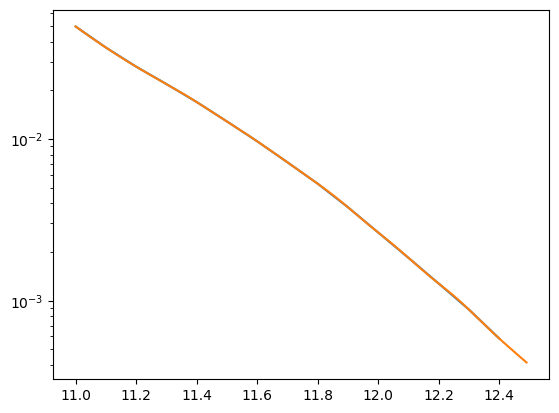

In [18]:
m = np.arange(11.0, 12.5, 0.1)
plt.plot(m, g.dndm(m))
m = np.arange(11.0, 12.5, 0.01)
plt.plot(m, g.dndm(m))
plt.yscale('log')


In [ ]:
g.mth_to_dens(12.5), g.mth_to_dens(11.5)

(8.321314534323241e-05, 0.004029801025430579)

## $\xi_{hh, m_1, m_2}$

In [1]:
import matplotlib.pyplot as plt
import importlib
import time
import numpy as np
from gal_goku import gal
importlib.reload(gal)

start_time = time.time()
g = gal.Gal(logging_level='DEBUG')
cosmo_test = g.xi_emu.cosmo_min + (g.xi_emu.cosmo_max - g.xi_emu.cosmo_min)/2
g.reset_cosmo(cosmo_test)
end_time = time.time()
print(f"Execution time for one cosmology : {end_time - start_time:.4f} seconds")

2025-04-29 15:50:52.435456: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 15:50:52.438701: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 15:50:52.448692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745959852.464600  498851 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745959852.469407  498851 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-29 15:50:52.486727: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Execution time for one cosmology : 16.1491 seconds


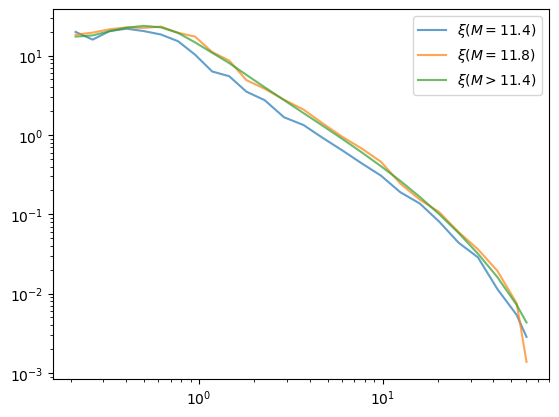

In [2]:
xi_hh_m1_m2 = g.xi_hh_m1m2([11.4, 11.4])
plt.plot(g.xi_emu.rbins, xi_hh_m1_m2, label=r'$\xi (M = 11.4)$', alpha=0.7)
xi_hh_m1_m2 = g.xi_hh_m1m2([11.8, 11.8])
plt.plot(g.rbins, xi_hh_m1_m2, label=r'$\xi (M = 11.8)$', alpha=0.7)
xi_hh_mth = g.xi_hh_mth(11.4, 11.4)
plt.plot(g.rbins, xi_hh_mth, label=r'$\xi (M >11.4)$', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [5]:
# Omega_m:
i = 0
cosmo_h = cosmo_test.copy()
cosmo_l = cosmo_test.copy()
cosmo_h[i] = cosmo_test[i] + (g.xi_emu.cosmo_max[i] - g.xi_emu.cosmo_min)[i]/4
cosmo_l[i] = cosmo_test[i] - (g.xi_emu.cosmo_max[i] - g.xi_emu.cosmo_min)[i]/4

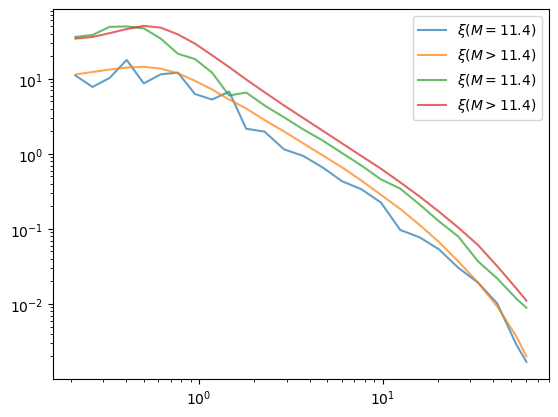

In [ ]:
g.reset_cosmo(cosmo_h)
xi_hh_m1_m2 = g.xi_hh_m1m2([11.4, 11.4])
plt.plot(g.xi_emu.rbins, xi_hh_m1_m2, label=r'$\xi (M = 11.4)$', alpha=0.7)

xi_hh_mth = g.xi_hh_mth(11.4, 11.4)
plt.plot(g.rbins, xi_hh_mth, label=r'$\xi (M >11.4)$', alpha=0.7)


g.reset_cosmo(cosmo_l)
xi_hh_m1_m2 = g.xi_hh_m1m2([11.4, 11.4])
plt.plot(g.xi_emu.rbins, xi_hh_m1_m2, label=r'$\xi (M = 11.4)$', alpha=0.7)

xi_hh_mth = g.xi_hh_mth(11.4, 11.4)
plt.plot(g.rbins, xi_hh_mth, label=r'$\xi (M >11.4)$', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.legend()

## $P_{hh, M_1, M_2}$:

In [10]:
import matplotlib.pyplot as plt
import importlib
import time
import numpy as np
from gal_goku import gal
importlib.reload(gal)

start_time = time.time()
g = gal.Gal(logging_level='DEBUG')
cosmo_test = g.xi_emu.cosmo_min + (g.xi_emu.cosmo_max - g.xi_emu.cosmo_min)/2
g.reset_cosmo(cosmo_test)
g.reset_hod()
end_time = time.time()
print(f"Execution time for one cosmology : {end_time - start_time:.4f} seconds")

Execution time for one cosmology : 12.5446 seconds


/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")


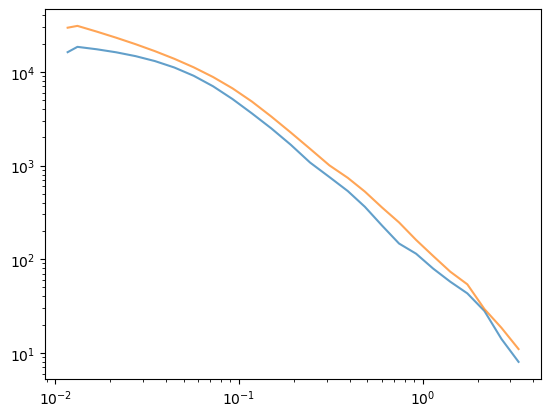

In [19]:
k, phh_m1m2 = g.p_hh_m1m2([11.3, 11.3])
plt.plot(k, phh_m1m2, label='p_hh_m1m2 at 11.3', alpha=0.7)
k, phh_m1m2 = g.p_hh_m1m2([11.6, 11.6])
plt.plot(k, phh_m1m2, label='p_hh_m1m2 at 11.6', alpha=0.7)
plt.xscale('log')
plt.yscale('log')


# HOD:

## Verify $N_c$ - $N_s$:

In [7]:
import matplotlib.pyplot as plt
import importlib
import time
import numpy as np
from gal_goku import gal
importlib.reload(gal)

start_time = time.time()
g = gal.Gal(logging_level='DEBUG')
cosmo_test = g.xi_emu.cosmo_min + (g.xi_emu.cosmo_max - g.xi_emu.cosmo_min)/2
g.reset_hod()
end_time = time.time()
print(f"Execution time for one cosmology : {end_time - start_time:.4f} seconds")

Execution time for one cosmology : 1.5763 seconds


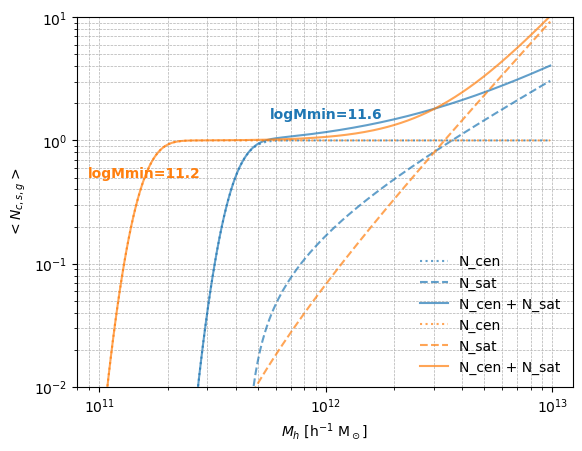

In [6]:
logMh = np.arange(11.0, 13, 0.01)

hod_params = {
            # Center galaxy parameters
            'logMmin': 11.6,
            'sig_logM': 0.1,
            #'alpha_inc': 0.5,
            #'Minc': 12.0,
            # Satellite galaxy parameters
            'M1': 12.5,
            'kappa': 1.1,
            'alpha': 1.03
                }

g.reset_hod(hod_params)
N_cen = g._Ncen(logMh)
N_sat = g._Nsat(logMh)
N_g = N_cen + N_sat
plt.plot(10**logMh, N_cen, label='N_cen', alpha=0.7, ls='dotted', color='C0')
plt.plot(10**logMh, N_sat, label='N_sat', alpha=0.7, ls='--', color='C0')
plt.plot(10**logMh, N_g, label='N_cen + N_sat', alpha=0.7, color='C0')

# Add a header for the group of labels
plt.text(10**12, 1.5, 'logMmin=11.6', color='C0', fontsize=10, fontweight='bold', ha='center')

hod_params = {
    # Central galaxy parameters
    'logMmin': 11.2,
    'sig_logM': 0.1,
    #'alpha_inc': 0.5,
    #'Minc': 12.0,
    # Satellite galaxy parameters
    'M1': 12.5,
    'kappa': 1.1,
    'alpha': 2.0
    }
g.reset_hod(hod_params)

N_cen = g._Ncen(logMh)
N_sat = g._Nsat(logMh)
N_g = N_cen + N_sat
plt.plot(10**logMh, N_cen, label='N_cen', alpha=0.7, ls='dotted', color='C1')
plt.plot(10**logMh, N_sat, label='N_sat', alpha=0.7, ls='--', color='C1')
plt.plot(10**logMh, N_g, label='N_cen + N_sat', alpha=0.7, color='C1')

# Add a header for the group of labels
plt.text(10**11.2, 0.5, 'logMmin=11.2', color='C1', fontsize=10, fontweight='bold', ha='center')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$M_h$ [h$^{-1}$ M$_\odot$]')
plt.ylabel(r'$<N_{c,s,g}>$')
plt.ylim(1e-2, 1e1)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend(framealpha=0)

In [2]:
import matplotlib.pyplot as plt
import importlib
import time
import numpy as np
from gal_goku import gal
importlib.reload(gal)

g = gal.Gal(logging_level='DEBUG')
cosmo_test = g.xi_emu.cosmo_min + (g.xi_emu.cosmo_max - g.xi_emu.cosmo_min)/2
logMh = np.arange(11.0, 13, 0.01)
g.config['logMh'] = logMh
g.reset_hod()
g.reset_cosmo(cosmo_test)

2025-05-02 14:36:22.201737: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 14:36:22.204927: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 14:36:22.214891: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746214582.230912  680433 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746214582.235703  680433 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-02 14:36:22.252780: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

(1e-06, 0.01)

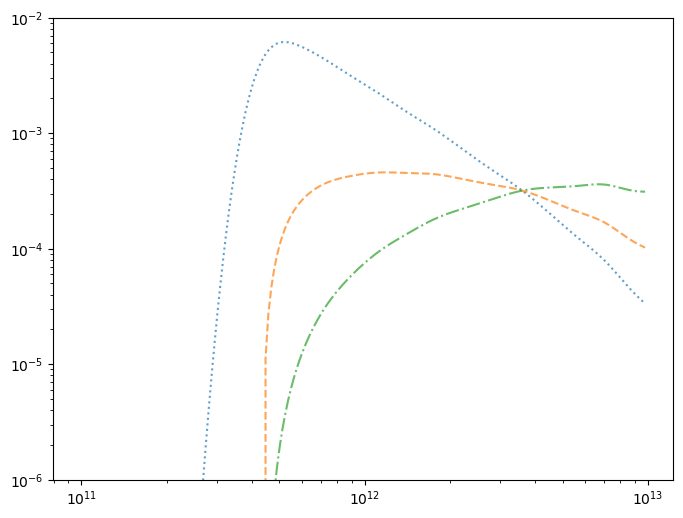

In [37]:
from scipy.integrate import quad

g.reset_cosmo(cosmo_test)
hod_params = {
            # Center galaxy parameters
            'logMmin': 11.6,
            'sig_logM': 0.1,
            #'alpha_inc': 0.5,
            #'Minc': 12.0,
            # Satellite galaxy parameters
            'M1': 12.5,
            'kappa': 1.1,
            'alpha': 1.03
                }

g.reset_hod(hod_params)
integrand = lambda x: g._Ncen(x) * g._Ncen(x) * g.dndlog_m(x)
conv_cen = []
for i in range(len(logMh)):
    conv_cen.append(integrand(logMh[i]))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(10**logMh, conv_cen, label='N_cen', alpha=0.7, ls='dotted', color='C0')
ax.set_xscale('log')

integrand = lambda x: g._Ncen(x) * g._Nsat(x) * g.dndlog_m(x)
conv_cen_sat = []
for i in range(len(logMh)):
    conv_cen_sat.append(integrand(logMh[i]))
ax.plot(10**logMh, conv_cen_sat, label='N_cen', alpha=0.7, ls='--', color='C1')
ax.set_xscale('log')
ax.set_yscale('log')


integrand = lambda x: g._Nsat(x) * g._Nsat(x) * g.dndlog_m(x)
conv_sat_sat = []
for i in range(len(logMh)):
    conv_sat_sat.append(integrand(logMh[i]))
ax.plot(10**logMh, conv_sat_sat, label='N_cen', alpha=0.7, ls='-.', color='C2')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e-6, 1e-2)

In [12]:
(conv_cen[1:] - conv_cen[:-1]).shape, logMh.shape

((199,), (200,))

In [33]:
g.dndlog_m(11.5), g.dndlog_m(12), g.dndlog_m(13)

(0.01285436246469685, 0.0026415490912937455, 3.183047017341935e-05)

In [34]:
g._Ncen(11.5), g._Ncen(12), g._Ncen(13)

(0.07864960352514339, 0.999999992291371, 1.0)

In [24]:
g._Ncen(11.7)*g.dndlog_m(11.7), g._Ncen(12)*g.dndlog_m(12)

(0.006609379007079757, 0.0026415490709310236)

#### The weghts for $P_{gg, cc}$, $P_{gg, cs}$, $P_{gg,ss}$:

In [ ]:
logMh = np.arange(11.0, 13, 0.01)

hod_params = {
            # Center galaxy parameters
            'logMmin': 11.6,
            'sig_logM': 0.1,
            #'alpha_inc': 0.5,
            #'Minc': 12.0,
            # Satellite galaxy parameters
            'M1': 12.5,
            'kappa': 1.1,
            'alpha': 1.03
                }

g.reset_hod(hod_params)
N_cen = g._Ncen(logMh)
N_sat = g._Nsat(logMh)
N_g = N_cen + N_sat
plt.plot(10**logMh, N_cen, label='N_cen', alpha=0.7, ls='dotted', color='C0')
plt.plot(10**logMh, N_sat, label='N_sat', alpha=0.7, ls='--', color='C0')
plt.plot(10**logMh, N_g, label='N_cen + N_sat', alpha=0.7, color='C0')

# Add a header for the group of labels
plt.text(10**12, 1.5, 'logMmin=11.6', color='C0', fontsize=10, fontweight='bold', ha='center')

hod_params = {
    # Central galaxy parameters
    'logMmin': 11.2,
    'sig_logM': 0.1,
    #'alpha_inc': 0.5,
    #'Minc': 12.0,
    # Satellite galaxy parameters
    'M1': 12.5,
    'kappa': 1.1,
    'alpha': 2.0
    }
g.reset_hod(hod_params)

N_cen = g._Ncen(logMh)
N_sat = g._Nsat(logMh)
N_g = N_cen + N_sat
plt.plot(10**logMh, N_cen, label='N_cen', alpha=0.7, ls='dotted', color='C1')
plt.plot(10**logMh, N_sat, label='N_sat', alpha=0.7, ls='--', color='C1')
plt.plot(10**logMh, N_g, label='N_cen + N_sat', alpha=0.7, color='C1')

# Add a header for the group of labels
plt.text(10**11.2, 0.5, 'logMmin=11.2', color='C1', fontsize=10, fontweight='bold', ha='center')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$M_h$ [h$^{-1}$ M$_\odot$]')
plt.ylabel(r'$<N_{c,s,g}>$')
plt.ylim(1e-2, 1e1)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend(framealpha=0)

(False, False, False)

## $P_{gg, cc}$:

In [1]:
import matplotlib.pyplot as plt
import importlib
import time
import numpy as np
from gal_goku import gal
importlib.reload(gal)

start_time = time.time()

config = {'logMh': np.arange(11.0, 12.8, 0.05),
          'smooth_xihh_r': 0,
          'smooth_phh_k': 0,
          'smooth_xihh_mass': 0,
          'r_range': [0.1, 50]}
g = gal.Gal(logging_level='DEBUG', config=config)
cosmo_test = g.xi_emu.cosmo_min + (g.xi_emu.cosmo_max - g.xi_emu.cosmo_min)/2


g.reset_hod()
g.reset_cosmo(cosmo_test)
end_time = time.time()
print(f"Execution time for one cosmology : {end_time - start_time:.4f} seconds")

2025-05-02 12:55:43.132083: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 12:55:43.135348: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 12:55:43.145376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746208543.161638  666864 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746208543.166519  666864 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-02 12:55:43.184163: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Execution time for one cosmology : 16.0145 seconds


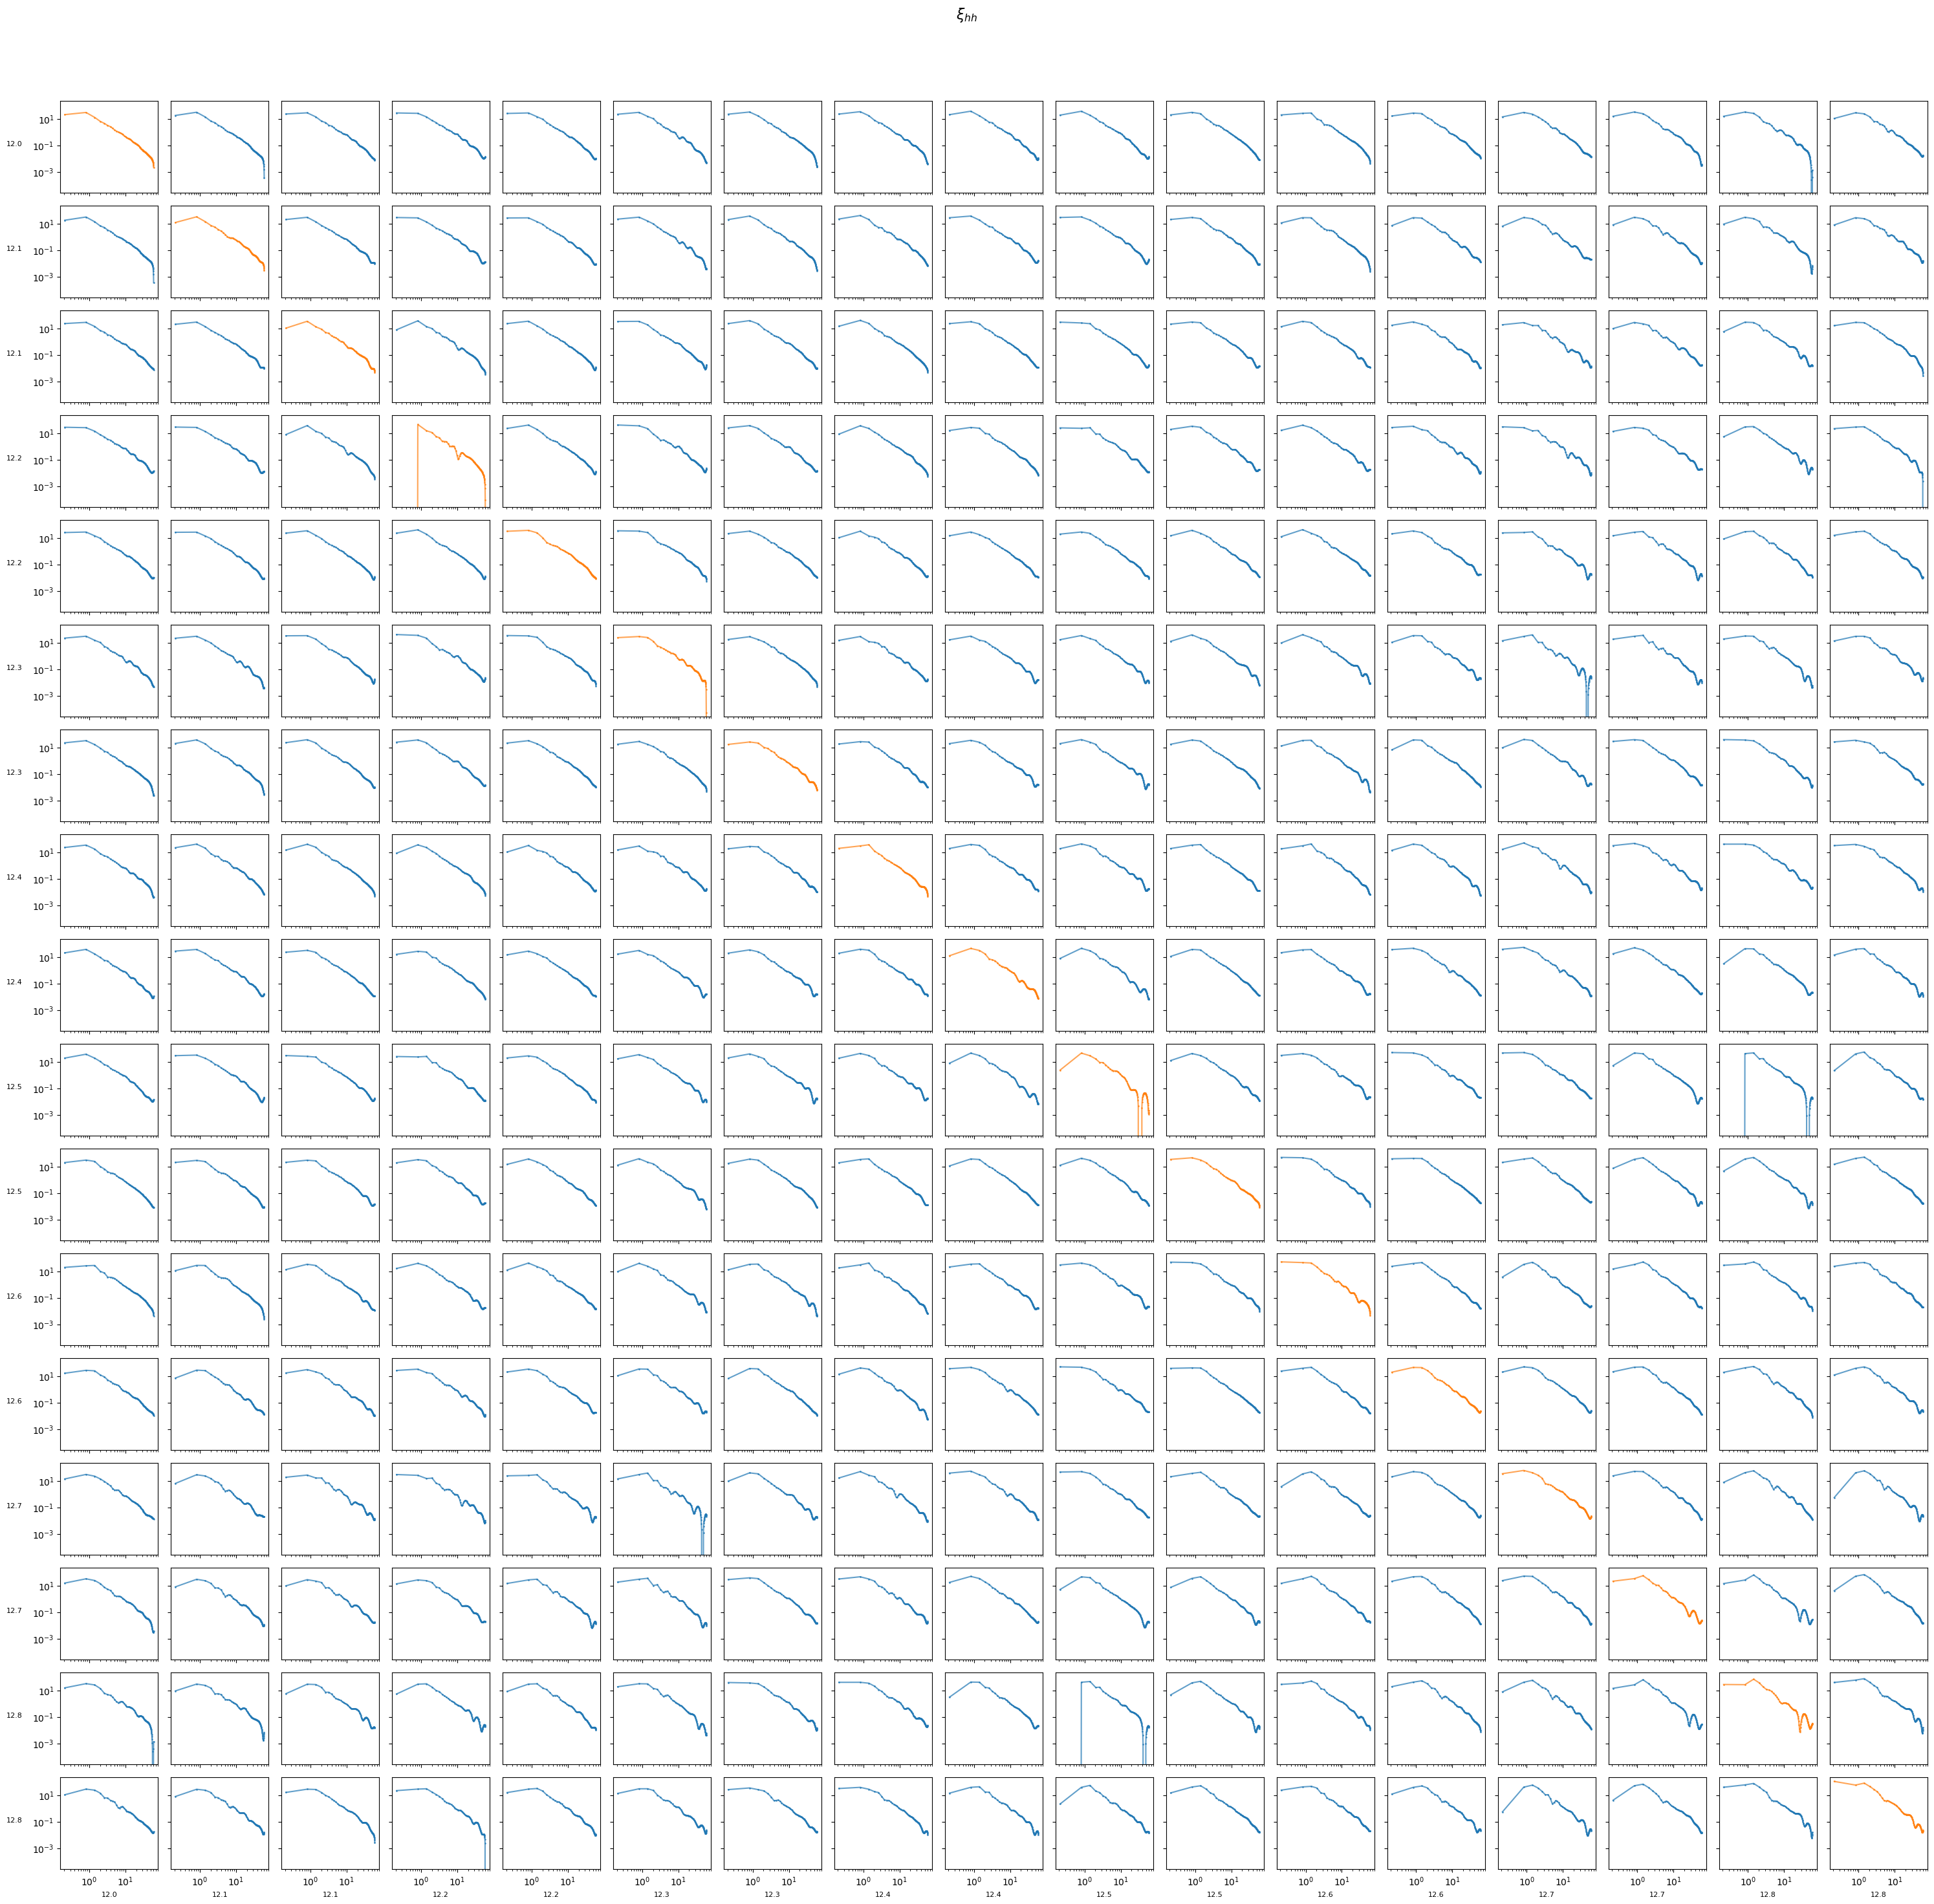

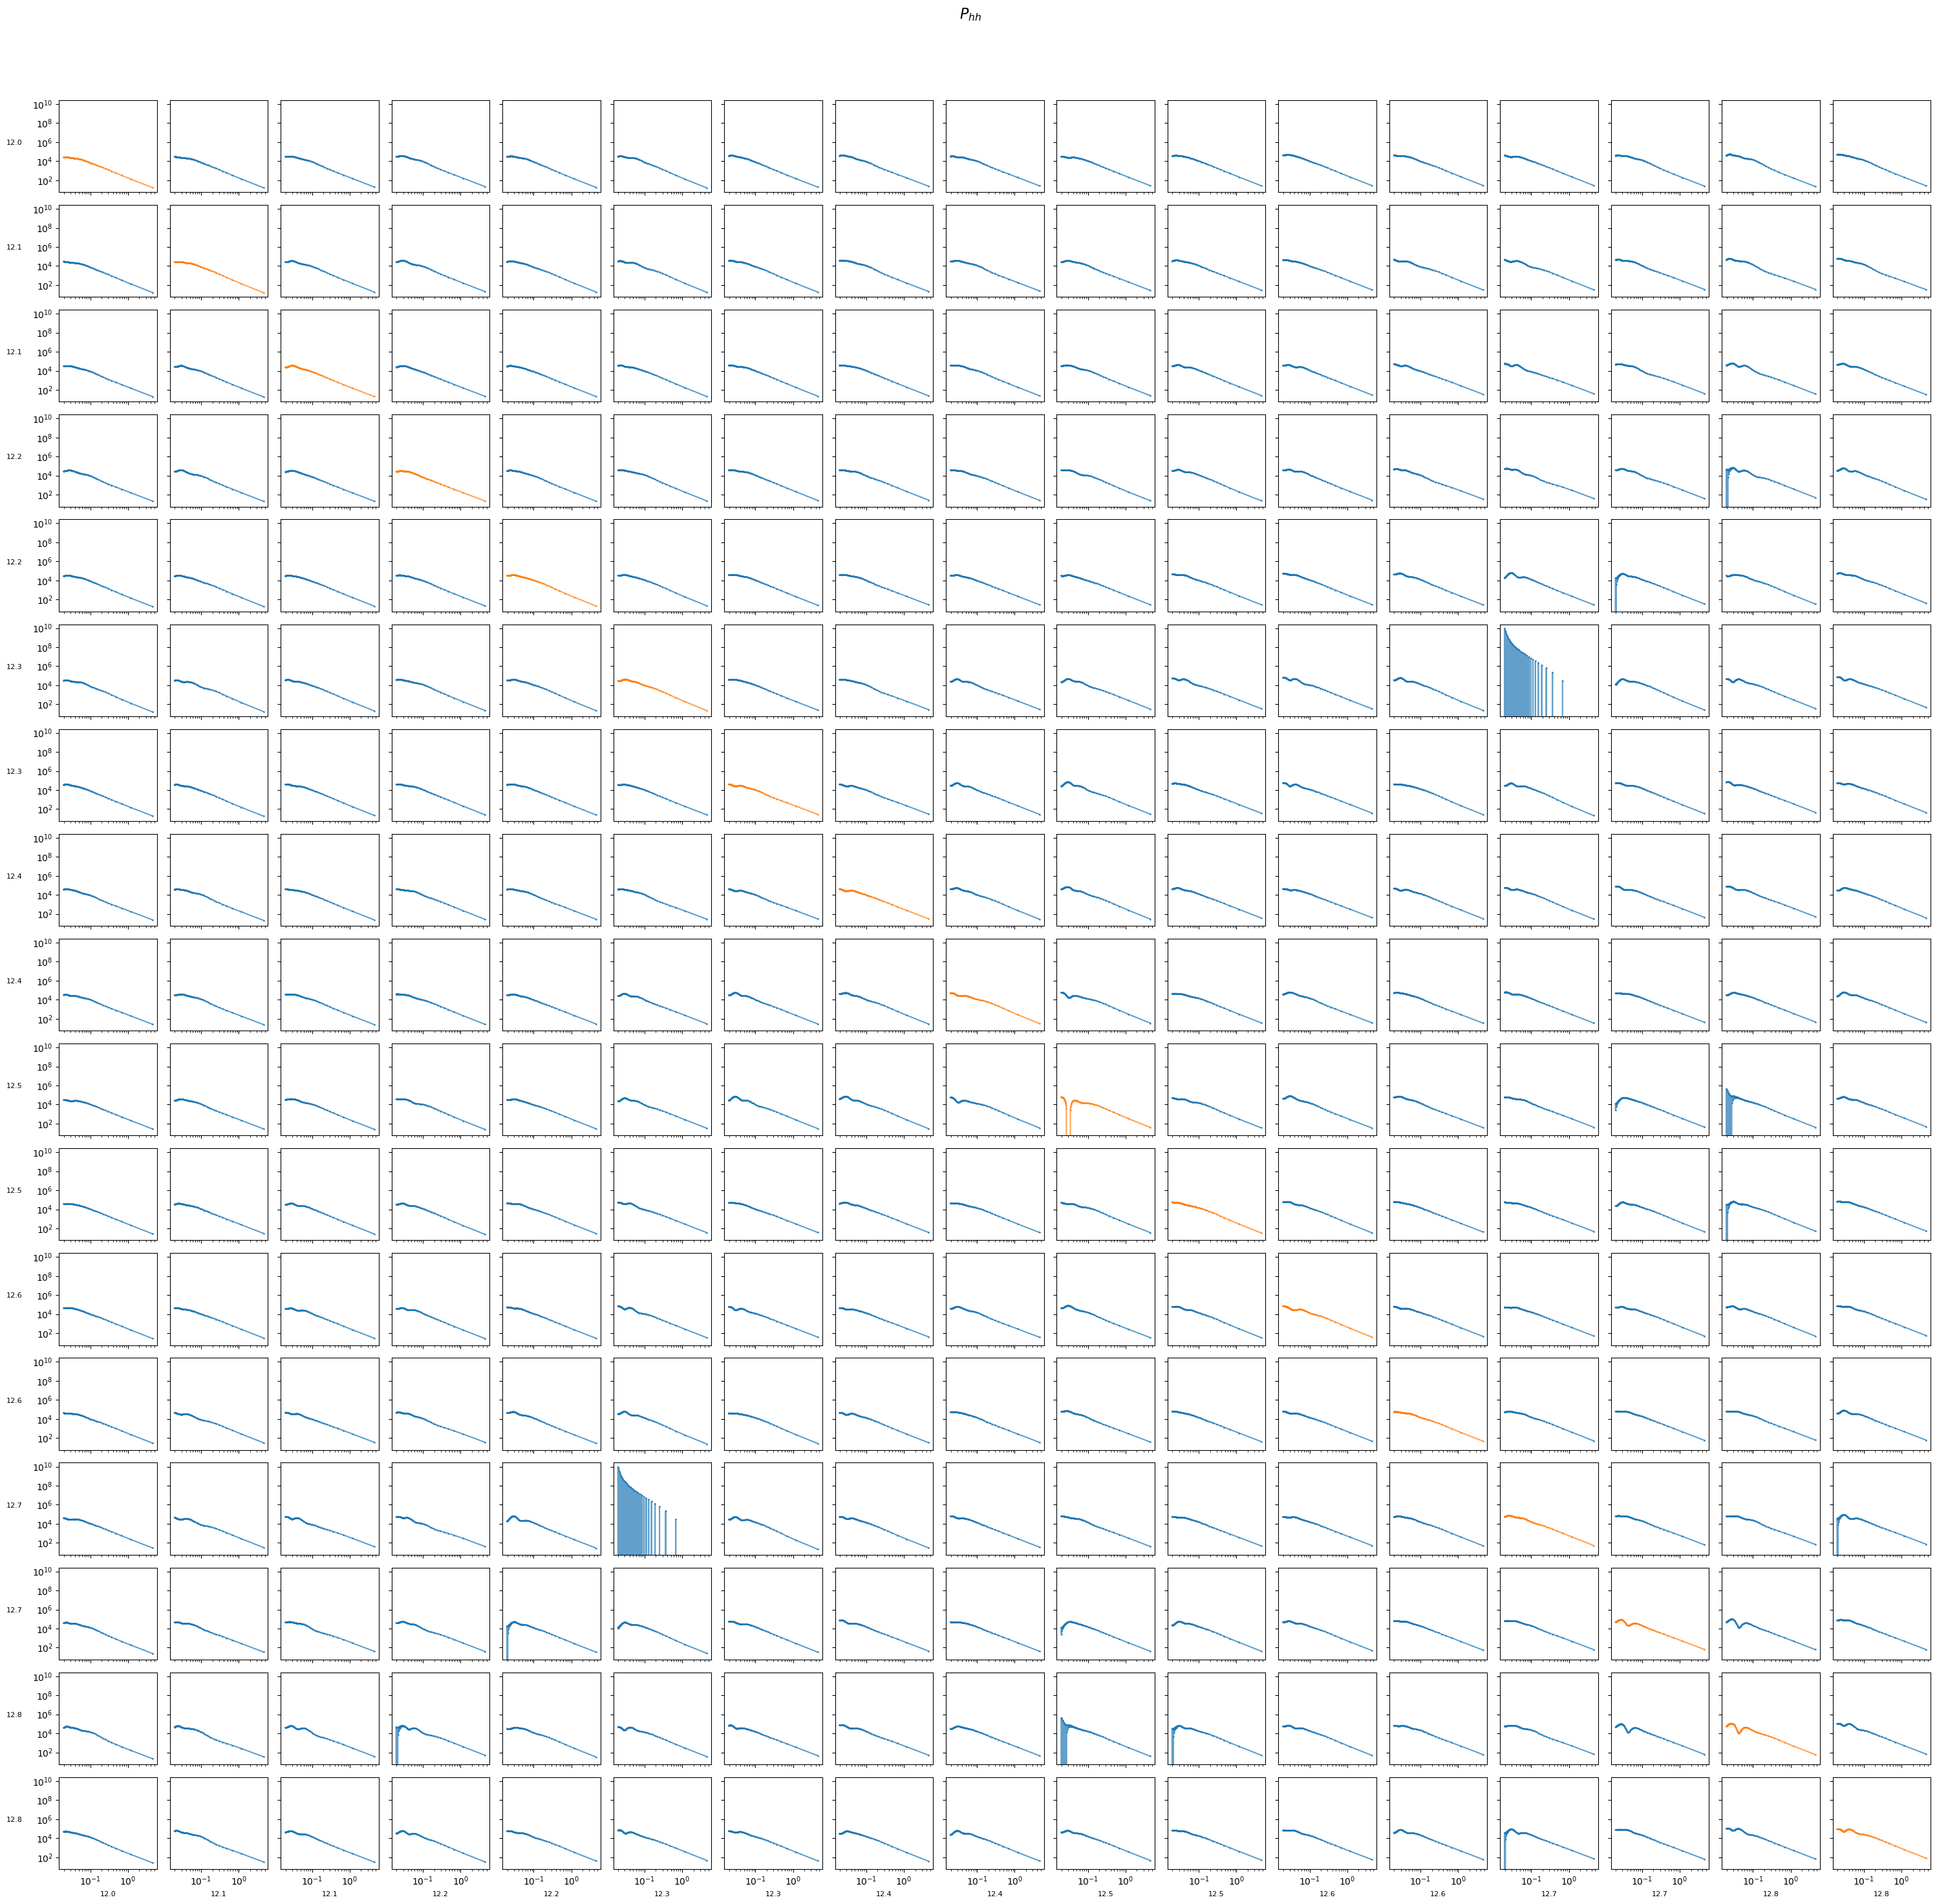

In [4]:
# Filter logMh to only include values >= 12
logMh = g.config['logMh']
logMh_filtered = logMh[logMh >= 12]

# Create a matrix of subplots for xi_hh
fig_xi, axes_xi = plt.subplots(len(logMh_filtered), len(logMh_filtered), figsize=(30, 30), sharex=True, sharey=True)
fig_xi.suptitle(r'$\xi_{hh}$', fontsize=16)

# Create a matrix of subplots for p_hh
fig_phh, axes_phh = plt.subplots(len(logMh_filtered), len(logMh_filtered), figsize=(30, 30), sharex=True, sharey=True)
fig_phh.suptitle(r'$P_{hh}$', fontsize=16)

for i, m1 in enumerate(logMh_filtered):  
    for j, m2 in enumerate(logMh_filtered):  
        # Plot xi_hh
        xi_hh = g.xi_hh_m1m2([m1, m2])
        color = 'C1' if i == j else None  # Use C1 color for diagonal
        axes_xi[i, j].plot(g.rbins_fine, xi_hh, alpha=0.7, marker='o', markersize=1, color=color)
        axes_xi[i, j].set_xscale('log')
        axes_xi[i, j].set_yscale('log')
        if i == len(logMh_filtered) - 1:
            axes_xi[i, j].set_xlabel(r'$r$ [Mpc/h]')
        if j == 0:
            axes_xi[i, j].set_ylabel(r'$\xi(r)$')

        # Plot p_hh
        k, phh = g.p_hh_m1m2([m1, m2])
        color = 'C1' if i == j else None  # Use C1 color for diagonal
        axes_phh[i, j].plot(k, phh, alpha=0.7, marker='o', markersize=1, color=color)
        axes_phh[i, j].set_xscale('log')
        axes_phh[i, j].set_yscale('log')
        if i == len(logMh_filtered) - 1:
            axes_phh[i, j].set_xlabel(r'$k$ [h/Mpc]')
        if j == 0:
            axes_phh[i, j].set_ylabel(r'$P(k)$')

# Add mass labels to the rows and columns
for ax, m in zip(axes_xi[:, 0], logMh_filtered):
    ax.set_ylabel(f'{m:.1f}', rotation=0, labelpad=20, fontsize=8)
for ax, m in zip(axes_xi[-1, :], logMh_filtered):
    ax.set_xlabel(f'{m:.1f}', fontsize=8)

for ax, m in zip(axes_phh[:, 0], logMh_filtered):
    ax.set_ylabel(f'{m:.1f}', rotation=0, labelpad=20, fontsize=8)
for ax, m in zip(axes_phh[-1, :], logMh_filtered):
    ax.set_xlabel(f'{m:.1f}', fontsize=8)

# Adjust layout for better spacing
fig_xi.tight_layout(rect=[0, 0, 1, 0.95])
fig_phh.tight_layout(rect=[0, 0, 1, 0.95])

In [1]:
import matplotlib.pyplot as plt
import importlib
import time
import numpy as np
from gal_goku import gal
importlib.reload(gal)

start_time = time.time()

config = {'logMh': np.arange(11.0, 13, 0.1),
          'smooth_xihh_r': 0,
          'smooth_phh_k': 0,
          'smooth_xihh_mass': 0,
          'r_range': [0.1, 50]}
g = gal.Gal(logging_level='DEBUG', config=config)
cosmo_test = g.xi_emu.cosmo_min + (g.xi_emu.cosmo_max - g.xi_emu.cosmo_min)/2


g.reset_hod()
g.reset_cosmo(cosmo_test)
end_time = time.time()
print(f"Execution time for one cosmology : {end_time - start_time:.4f} seconds")

2025-05-02 15:15:58.445056: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 15:15:58.448301: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 15:15:58.458331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746216958.474664  682281 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746216958.479545  682281 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-02 15:15:58.497384: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Execution time for one cosmology : 16.0037 seconds


/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")


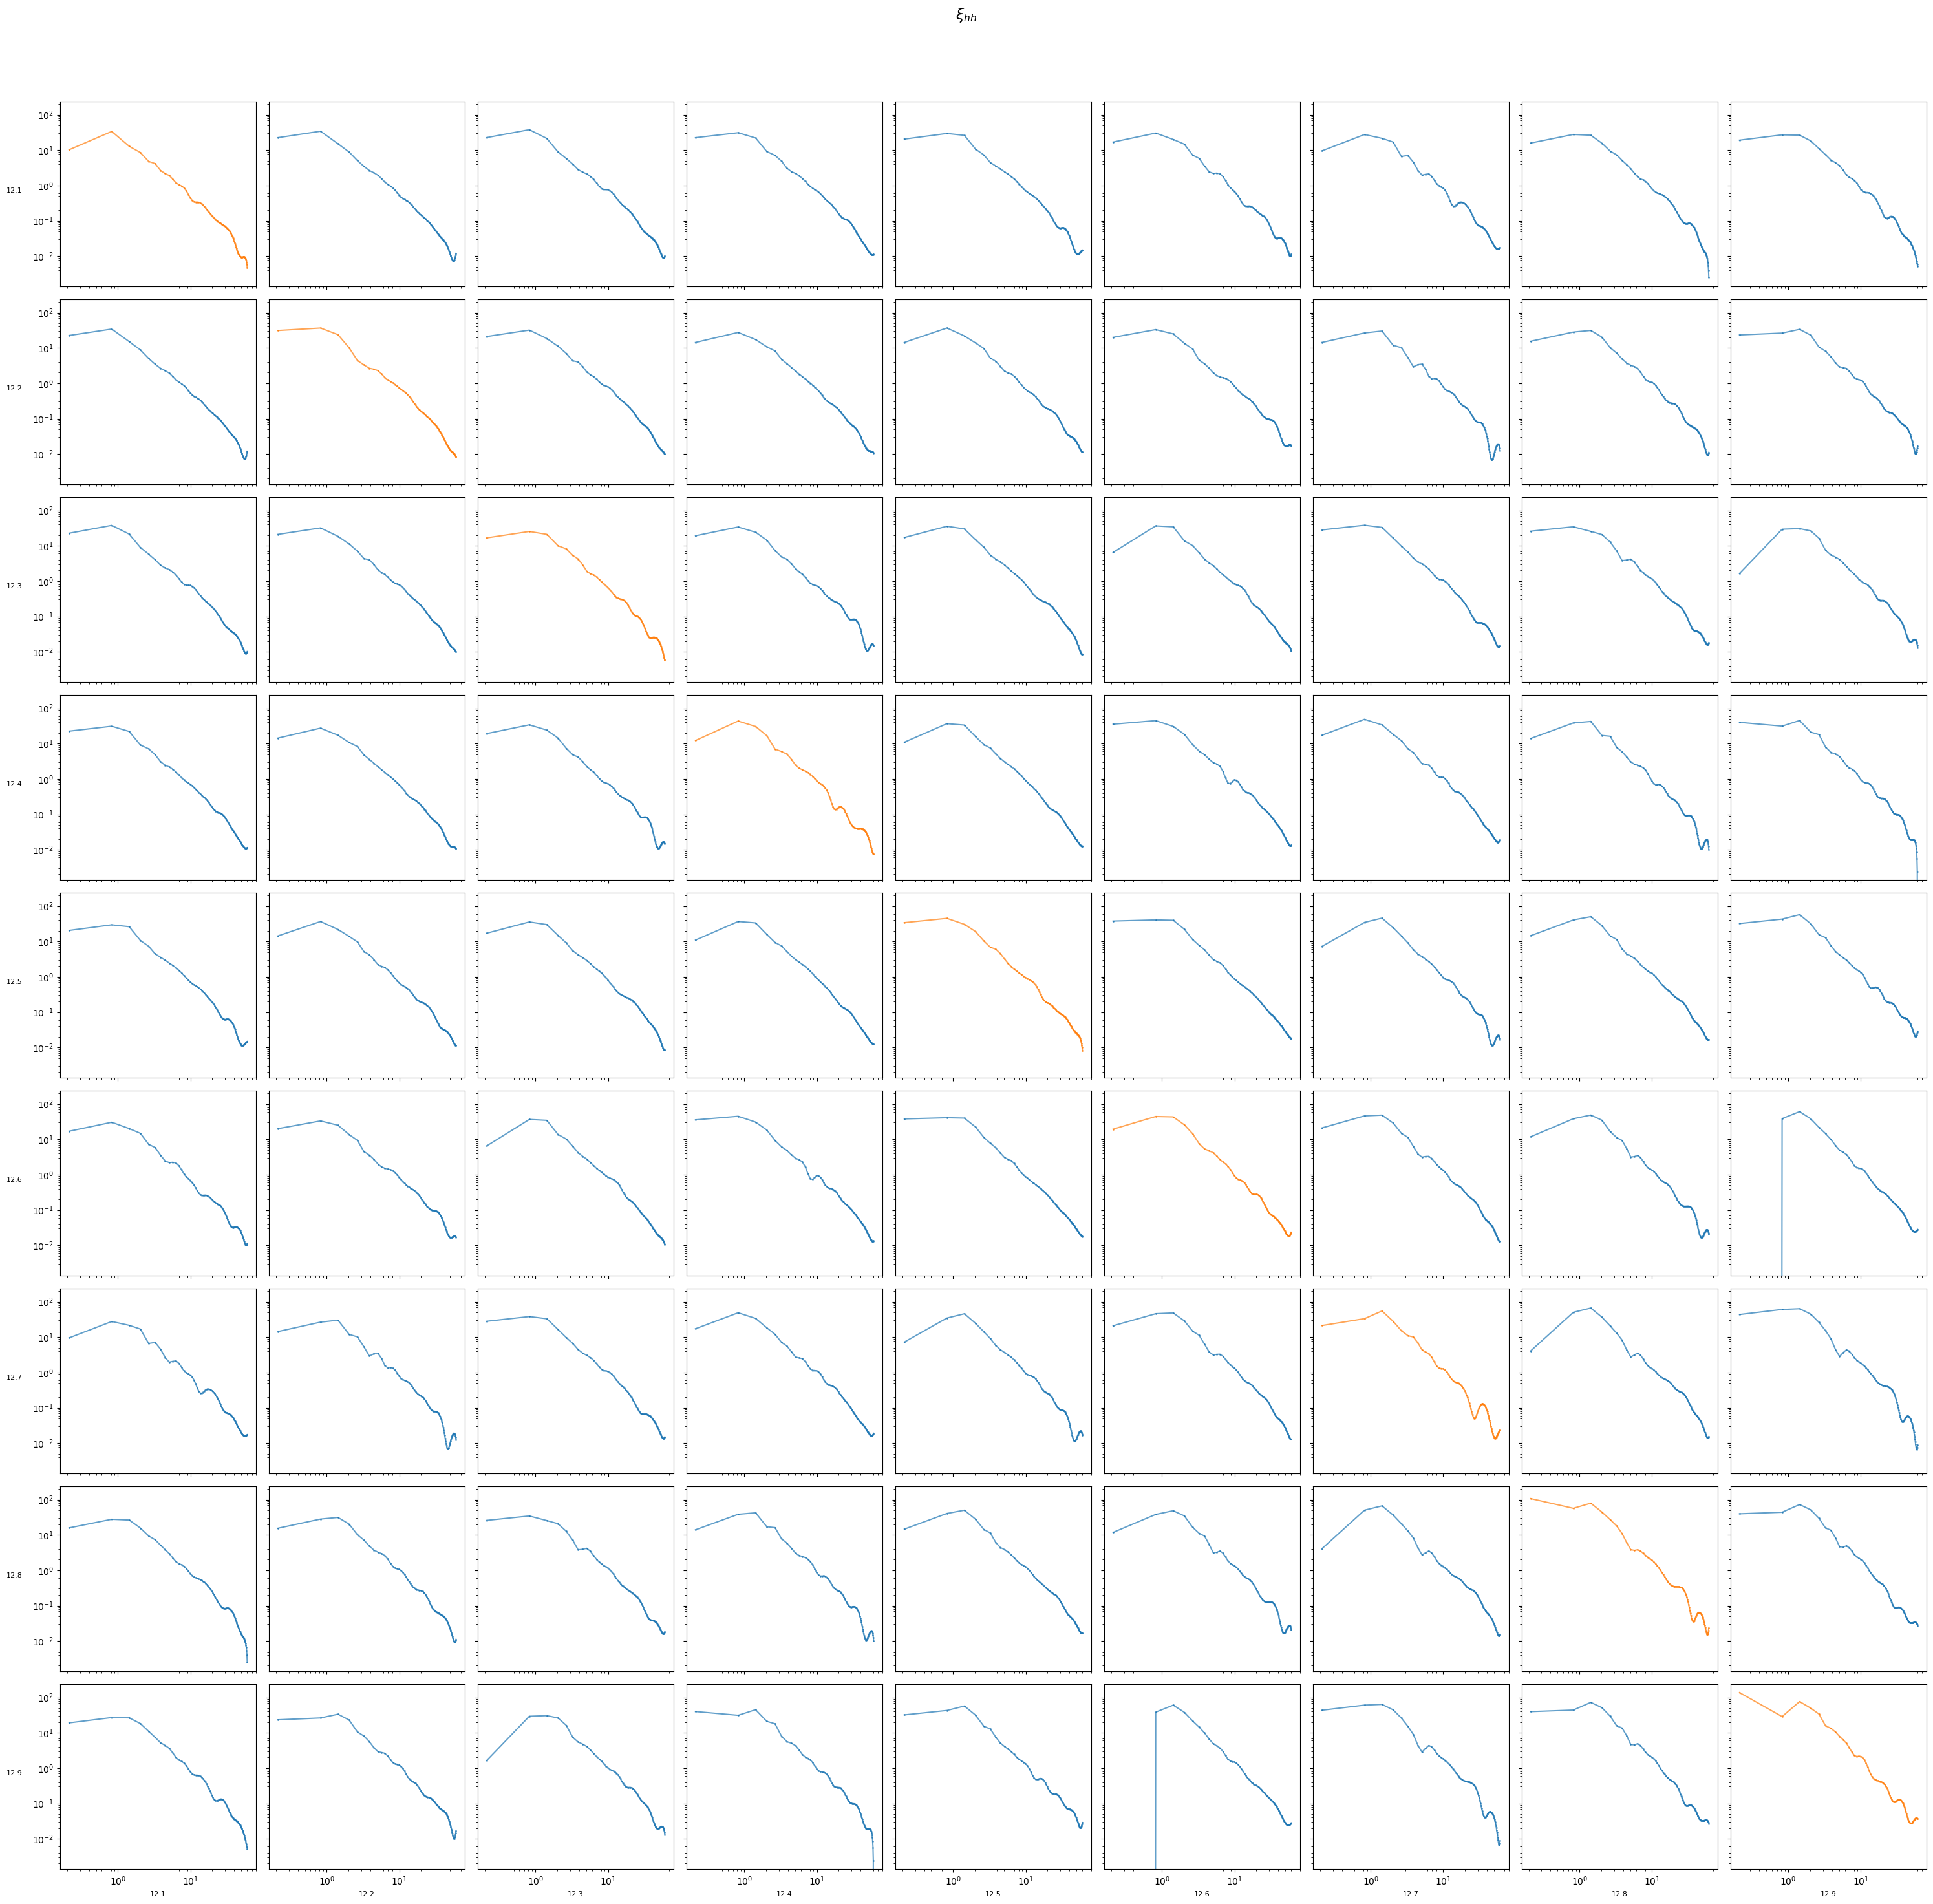

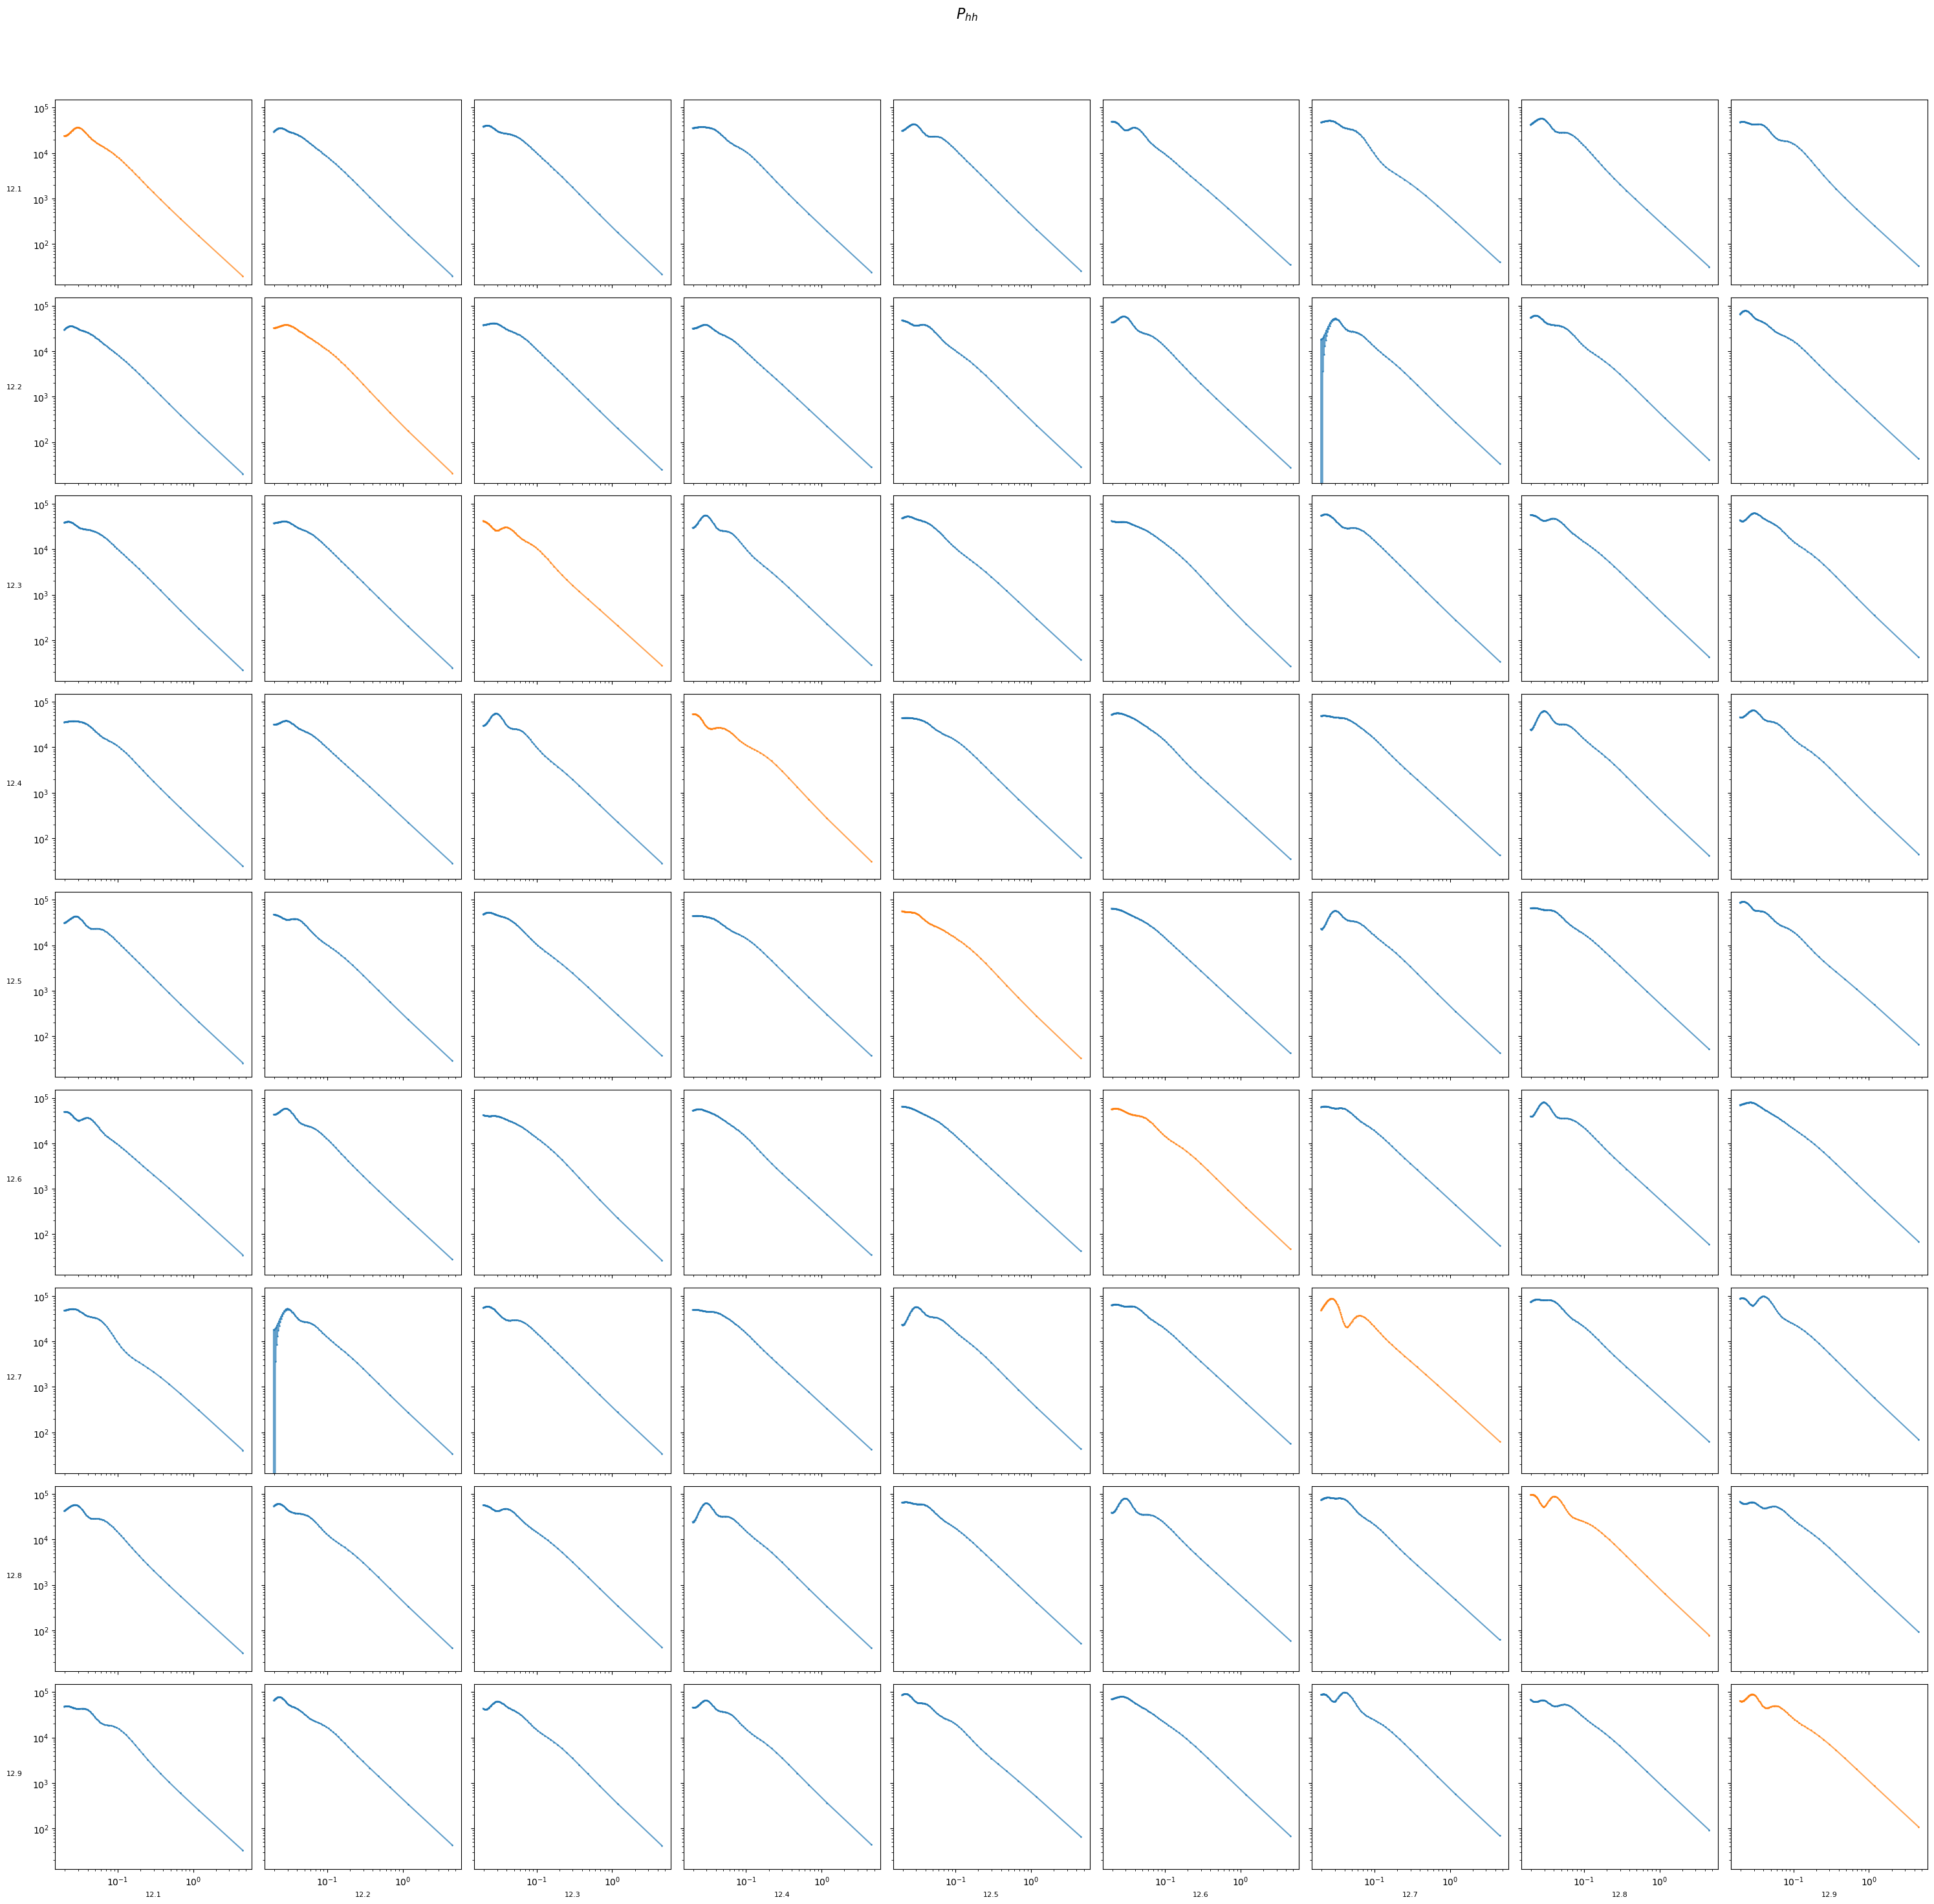

In [2]:
# Filter logMh to only include every 10th element and values >= 12
logMh = g.config['logMh']
logMh_filtered = logMh[logMh >= 12]

# Create a matrix of subplots for xi_hh
fig_xi, axes_xi = plt.subplots(len(logMh_filtered), len(logMh_filtered), figsize=(30, 30), sharex=True, sharey=True)
fig_xi.suptitle(r'$\xi_{hh}$', fontsize=16)

# Create a matrix of subplots for p_hh
fig_phh, axes_phh = plt.subplots(len(logMh_filtered), len(logMh_filtered), figsize=(30, 30), sharex=True, sharey=True)
fig_phh.suptitle(r'$P_{hh}$', fontsize=16)

for i, m1 in enumerate(logMh_filtered):  
    for j, m2 in enumerate(logMh_filtered):  
        # Plot xi_hh
        xi_hh = g.xi_hh_m1m2([m1, m2])
        color = 'C1' if i == j else None  # Use C1 color for diagonal
        axes_xi[i, j].plot(g.rbins_fine, xi_hh, alpha=0.7, marker='o', markersize=1, color=color)
        axes_xi[i, j].set_xscale('log')
        axes_xi[i, j].set_yscale('log')
        if i == len(logMh_filtered) - 1:
            axes_xi[i, j].set_xlabel(r'$r$ [Mpc/h]')
        if j == 0:
            axes_xi[i, j].set_ylabel(r'$\xi(r)$')

        # Plot p_hh
        k, phh = g.p_hh_m1m2([m1, m2])
        color = 'C1' if i == j else None  # Use C1 color for diagonal
        axes_phh[i, j].plot(k, phh, alpha=0.7, marker='o', markersize=1, color=color)
        axes_phh[i, j].set_xscale('log')
        axes_phh[i, j].set_yscale('log')
        if i == len(logMh_filtered) - 1:
            axes_phh[i, j].set_xlabel(r'$k$ [h/Mpc]')
        if j == 0:
            axes_phh[i, j].set_ylabel(r'$P(k)$')

# Add mass labels to the rows and columns
for ax, m in zip(axes_xi[:, 0], logMh_filtered):
    ax.set_ylabel(f'{m:.1f}', rotation=0, labelpad=20, fontsize=8)
for ax, m in zip(axes_xi[-1, :], logMh_filtered):
    ax.set_xlabel(f'{m:.1f}', fontsize=8)

for ax, m in zip(axes_phh[:, 0], logMh_filtered):
    ax.set_ylabel(f'{m:.1f}', rotation=0, labelpad=20, fontsize=8)
for ax, m in zip(axes_phh[-1, :], logMh_filtered):
    ax.set_xlabel(f'{m:.1f}', fontsize=8)

# Adjust layout for better spacing
fig_xi.tight_layout(rect=[0, 0, 1, 0.95])
fig_phh.tight_layout(rect=[0, 0, 1, 0.95])

In [19]:
import matplotlib.pyplot as plt
import importlib
import time
import numpy as np
from gal_goku import gal
importlib.reload(gal)

start_time = time.time()

config = {'logMh': np.arange(11.0, 12.5, 0.05),
          'smooth_xihh_r': 1e-2,
          'smooth_phh_k': 1e-2,
          'smooth_xihh_mass': 0,
          'r_range': [0.1, 50]}
g = gal.Gal(logging_level='DEBUG', config=config)
cosmo_test = g.xi_emu.cosmo_min + (g.xi_emu.cosmo_max - g.xi_emu.cosmo_min)/2
g.reset_hod()
g.reset_cosmo(cosmo_test)
end_time = time.time()
print(f"Execution time for one cosmology : {end_time - start_time:.4f} seconds")

Execution time for one cosmology : 12.4302 seconds


In [34]:
def pgg_conv_test():
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    all_pggs= []
    for i, dlogMh in enumerate([0.02, 0.05, 0.1]):
        g.config['logMh'] = np.arange(11.0, 12.5, dlogMh)
        k, pgg_cc = g._pgg_2h_cc()
        all_pggs.append(pgg_cc)
        ax[i].plot(k, pgg_cc, marker='o', markersize=2, label=f'dlogMh = {dlogMh}')
        ax[i].set_title(r'$P_{gg}$')
        ax[i].set_xscale('log')
        ax[i].set_yscale('log')
        ax[i].grid()
        ax[i].set_ylabel(r'$P_{gg}$')
        ax[i].set_xlabel(r'$k$ [h/Mpc]')
        ax[i].legend()
    fig.suptitle(r'$P_{gg}$ convergence test', fontsize=16)
    fig.tight_layout()
    # plot the ratio
    fig_ratio, ax_ratio = plt.subplots(1, 1, figsize=(3, 2))
    for i in range(1, len(all_pggs)):
        ratio = all_pggs[i] / all_pggs[0]
        ax_ratio.plot(k, ratio, label=f'dlogMh = {0.1/(2**i):.3f}')
        ax_ratio.set_title(r'$P_{gg}$')
        ax_ratio.set_xscale('log')
        ax_ratio.grid()
        ax_ratio.set_ylabel('ratio')
        ax_ratio.set_xlabel(r'$k$ [h/Mpc]')
        ax_ratio.grid(which='both', linestyle='--', linewidth=0.5)
        ax_ratio.set_ylim(0.95, 1.05)

/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/gal.py:397: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spl = UnivariateSpline(k, phh, s= self.config['smooth_phh_k'], k=3)
/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/gal.py:369: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition ab

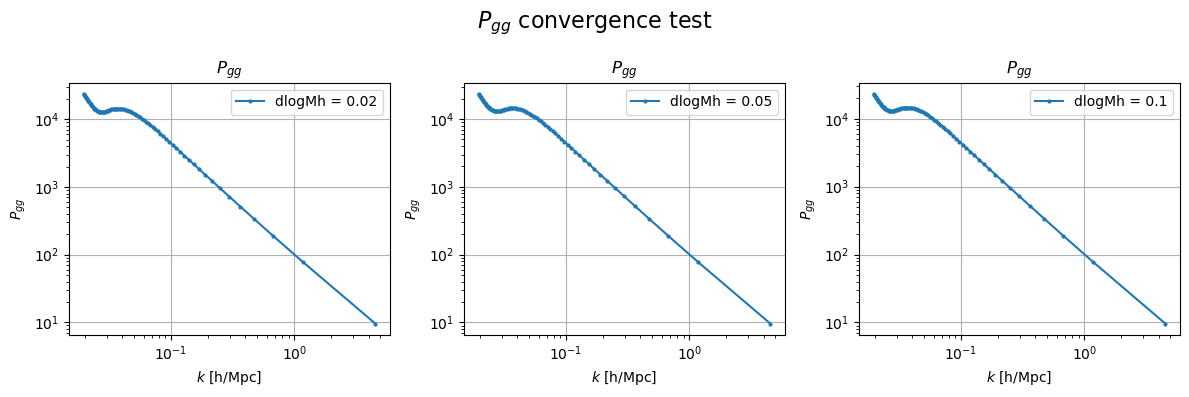

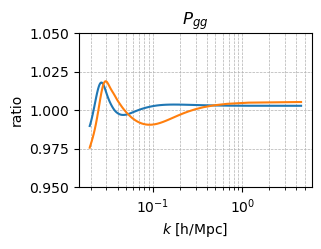

In [35]:
pgg_conv_test()

/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/gal.py:397: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spl = UnivariateSpline(k, phh, s= self.config['smooth_phh_k'], k=3)
/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/gal.py:369: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition ab

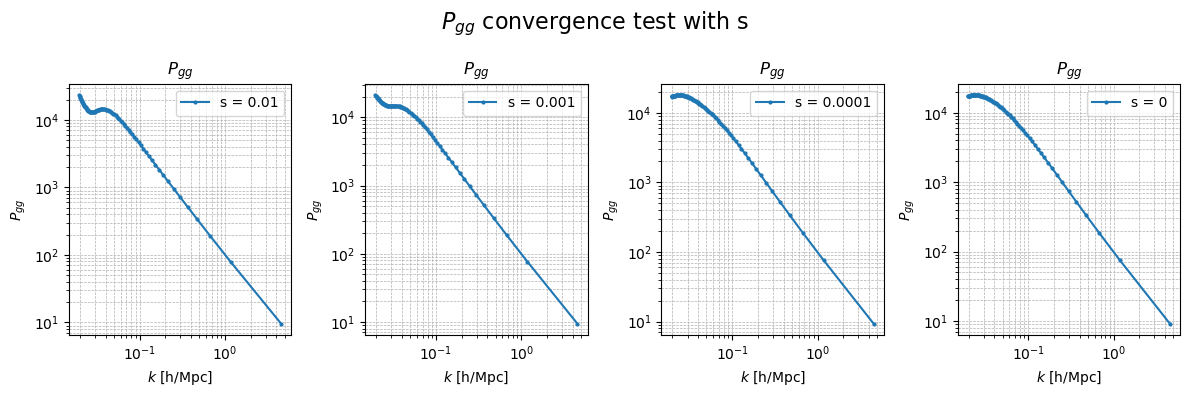

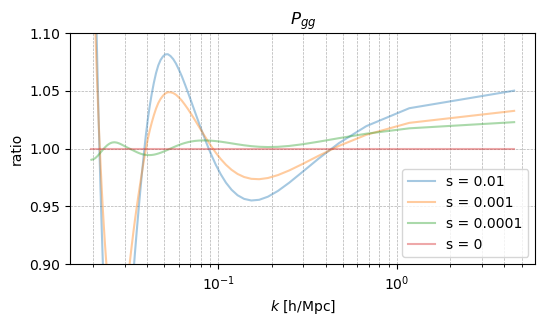

In [20]:
g.config['logMh'] = np.arange(11.0, 12.45, 0.05)
def pgg_conv_test_smoothing_factor():
    fig, ax = plt.subplots(1, 4, figsize=(12, 4))
    all_pggs= []
    for i, s in enumerate([1e-2, 1e-3, 1e-4, 0]):
        g.config['smooth_phh_k'] = s
        g.config['smooth_xihh_r'] = s
        k, pgg_cc = g._pgg_2h_cc()
        all_pggs.append(pgg_cc)
        ax[i].plot(k, pgg_cc, marker='o', markersize=2, label=f's = {s}')
        ax[i].set_title(r'$P_{gg}$')
        ax[i].set_xscale('log')
        ax[i].set_yscale('log')
        ax[i].grid()
        ax[i].set_ylabel(r'$P_{gg}$')
        ax[i].set_xlabel(r'$k$ [h/Mpc]')
        ax[i].legend()
        ax[i].grid(which='both', linestyle='--', linewidth=0.5)
    fig.suptitle(r'$P_{gg}$ convergence test with s', fontsize=16)
    fig.tight_layout()
    # plot the ratio
    fig_ratio, ax_ratio = plt.subplots(1, 1, figsize=(6, 3))
    for i, s in enumerate([1e-2, 1e-3, 1e-4, 0]):
        ratio = all_pggs[i] / all_pggs[-1]
        ax_ratio.plot(k, ratio, label=f's = {s}', alpha=0.4)
    ax_ratio.set_title(r'$P_{gg}$')
    ax_ratio.set_xscale('log')
    ax_ratio.grid()
    ax_ratio.set_ylabel('ratio')
    ax_ratio.set_xlabel(r'$k$ [h/Mpc]')
    ax_ratio.grid(which='both', linestyle='--', linewidth=0.5)
    ax_ratio.set_ylim(0.9, 1.1)
    ax_ratio.legend()
pgg_conv_test_smoothing_factor()

In [11]:
g.config

{'logMh': array([11.  , 11.05, 11.1 , 11.15, 11.2 , 11.25, 11.3 , 11.35, 11.4 ,
        11.45, 11.5 , 11.55, 11.6 , 11.65, 11.7 , 11.75, 11.8 , 11.85,
        11.9 , 11.95, 12.  , 12.05, 12.1 , 12.15, 12.2 , 12.25, 12.3 ,
        12.35, 12.4 ]),
 'smooth_xihh_r': 0.0001,
 'smooth_phh_k': 0.0001,
 'smooth_xihh_mass': 0,
 'r_range': [0.1, 50]}

- We need some level of smooothing on the $r$ or $k$ direction to smooth the fluctuations in $(P)$
- but too much of it ( `s > 3e-4` ) introduces weird features at $k \sim 3\times10^{-2} \ h/Mpc$, this can be fixed when we have the propagator for $r > 50 Mpc/h$

## what $M_{h, upper}$?

In [7]:
import matplotlib.pyplot as plt
import importlib
import time
import numpy as np
from gal_goku import gal
importlib.reload(gal)

start_time = time.time()

config = {'logMh': np.arange(11.0, 12.5, 0.05),
          'smooth_xihh_r': 3e-4,
          'smooth_phh_k': 3e-4,
          'smooth_xihh_mass': 0,
          'r_range': [0.1, 50]}
g = gal.Gal(logging_level='DEBUG', config=config)
cosmo_test = g.xi_emu.cosmo_min + (g.xi_emu.cosmo_max - g.xi_emu.cosmo_min)/2
g.reset_hod()
g.reset_cosmo(cosmo_test)
end_time = time.time()
print(f"Execution time for one cosmology : {end_time - start_time:.4f} seconds")

Execution time for one cosmology : 16.1114 seconds


/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/gal.py:369: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spl = UnivariateSpline(self.xi_emu.rbins, xi_exact_mass, s=self.config['smooth_xihh_r'], k=3)
/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-gal-emu/src/gal_goku/gal_goku/gal.py:397: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does no

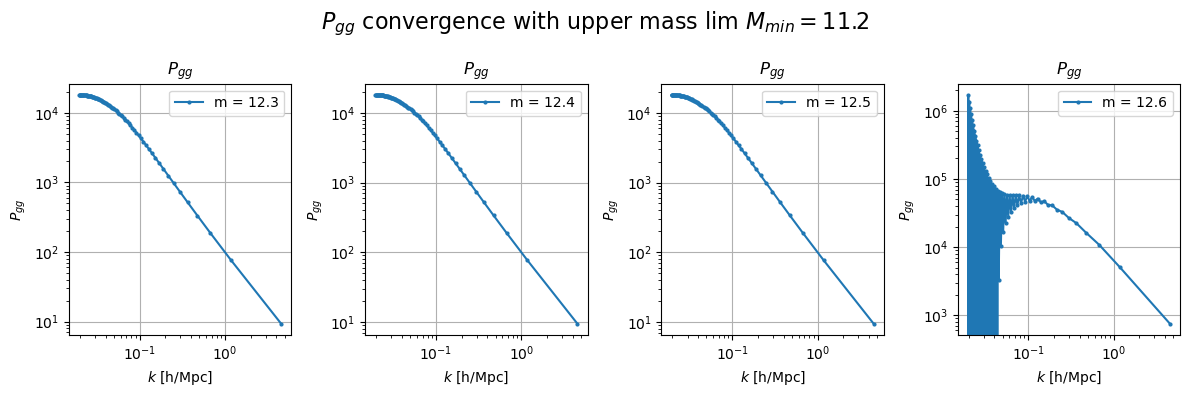

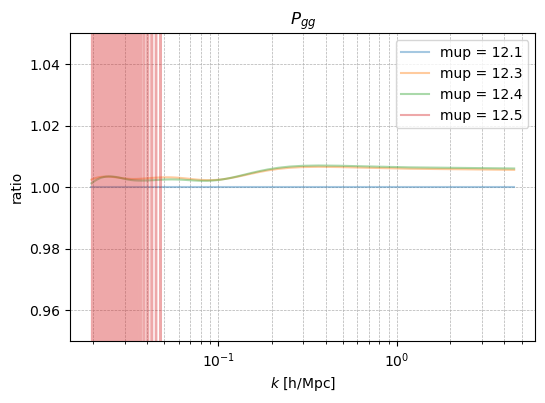

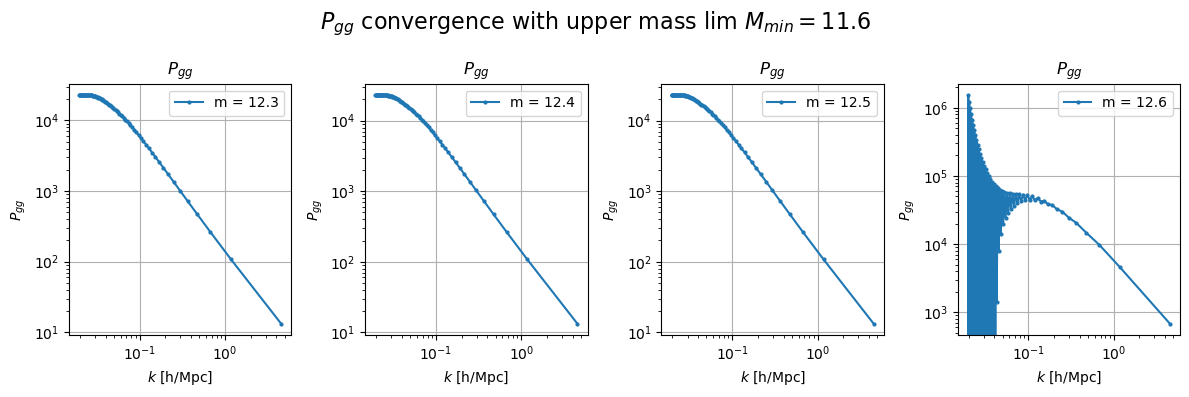

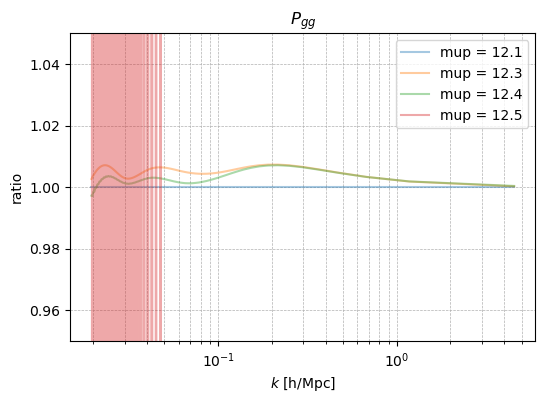

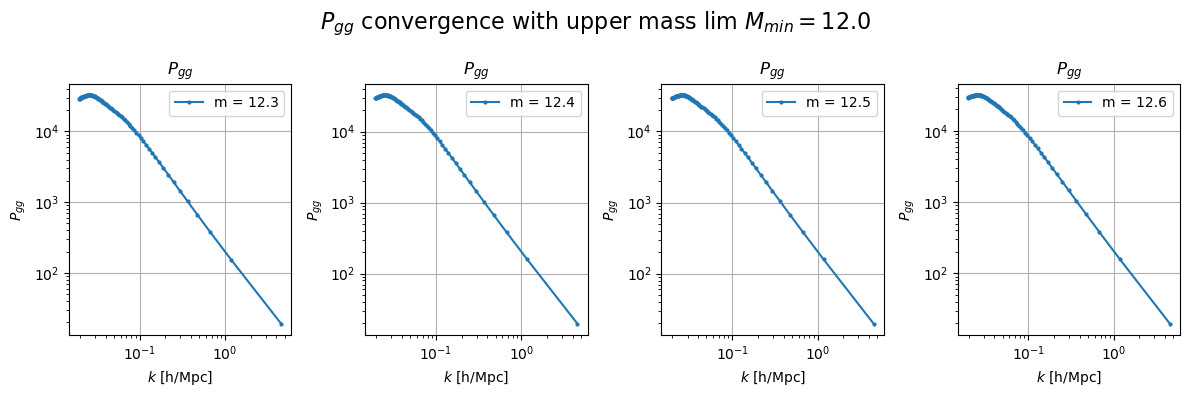

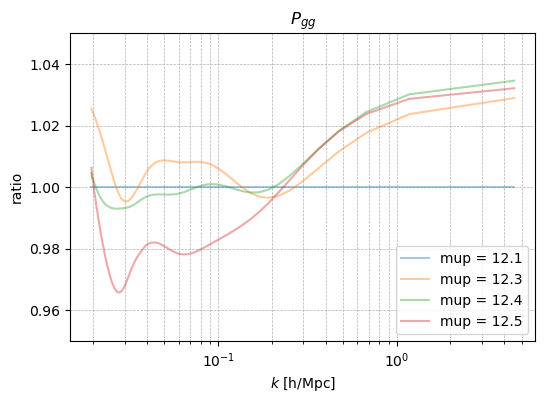

In [ ]:
def pgg_conv_test_upper_mass(hod_Mmin=11.2):
    fig, ax = plt.subplots(1, 4, figsize=(12, 4))
    all_pggs= []
    for i, m_up in enumerate([12.3, 12.4, 12.5, 12.6]):
        g.config['logMh'] = np.arange(11.0, m_up, 0.05)
        hod_params = {
            # Central galaxy parameters
            'logMmin': hod_Mmin,
            'sig_logM': 0.1,
            #'alpha_inc': 0.5,
            #'Minc': 12.0,
            # Satellite galaxy parameters
            'M1': 12.5,
            'kappa': 1.1,
            'alpha': 2.0
            }
        g.reset_hod(hod_params)
        k, pgg_cc = g._pgg_2h_cc()
        all_pggs.append(pgg_cc)
        ax[i].plot(k, pgg_cc, marker='o', markersize=2, label=r'$M_{h, upper}$ ='+str(m_up))
        ax[i].set_title(r'$P_{gg}$')
        ax[i].set_xscale('log')
        ax[i].set_yscale('log')
        ax[i].grid()
        ax[i].set_ylabel(r'$P_{gg}$')
        ax[i].set_xlabel(r'$k$ [h/Mpc]')
        ax[i].legend()
    fig.suptitle(r'$P_{gg}$ convergence |  HOD: $M_{min}=$'+f'{hod_Mmin}', fontsize=16)
    fig.tight_layout()
    # plot the ratio
    fig_ratio, ax_ratio = plt.subplots(1, 1, figsize=(6, 4))
    for i, m_up in enumerate([12.1, 12.3, 12.4, 12.5]):
        ratio = all_pggs[i] / all_pggs[0]
        ax_ratio.plot(k, ratio, label=r'M_{h, upper} ='+str(m_up))
    ax_ratio.set_title(r'$P_{gg}$')
    ax_ratio.set_xscale('log')
    ax_ratio.grid()
    ax_ratio.set_ylabel('ratio')
    ax_ratio.set_xlabel(r'$k$ [h/Mpc]')
    ax_ratio.grid(which='both', linestyle='--', linewidth=0.5)
    ax_ratio.set_ylim(0.9, 1.1)
    ax_ratio.legend()
    ax_ratio.legend()
    ax_ratio.set_ylim(0.95, 1.05)
pgg_conv_test_upper_mass(hod_Mmin=11.2)
pgg_conv_test_upper_mass(hod_Mmin=11.6)
pgg_conv_test_upper_mass(hod_Mmin=12.0)

So, as long as $M_{cen, \ min} < 12.0 $, we can stop at $M_{upper} \sim 12.4$ and still have $< 3\%$ error in $P_{gg}$

The plot below shows, for $M_{upper} > 12.45$, we need some level of smoothing ($s = 10^{-4}$)

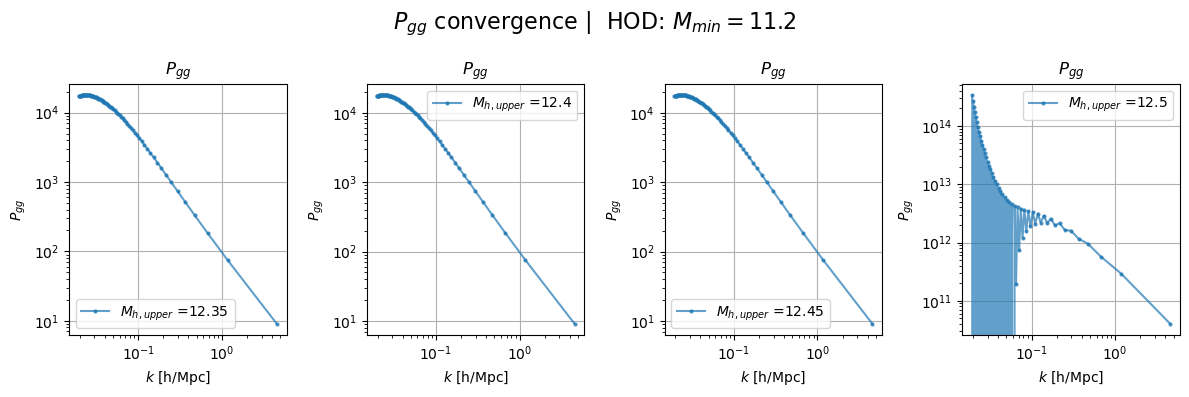

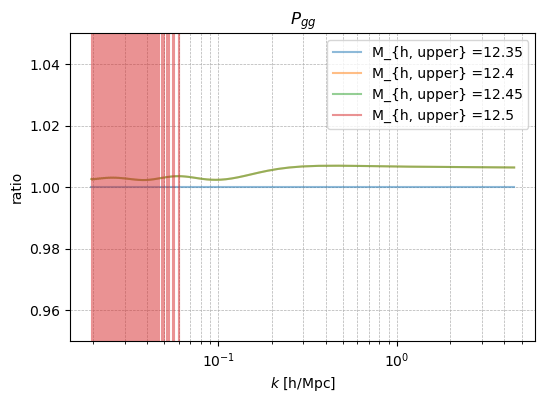

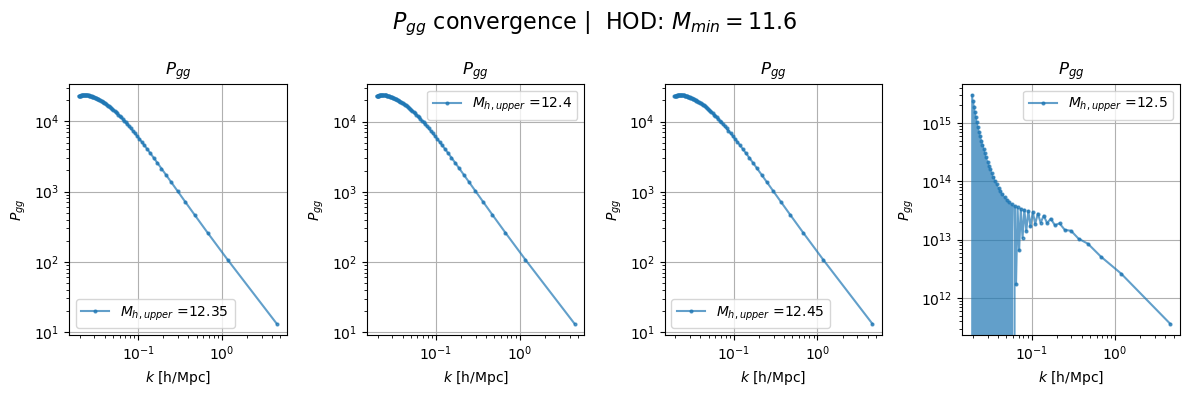

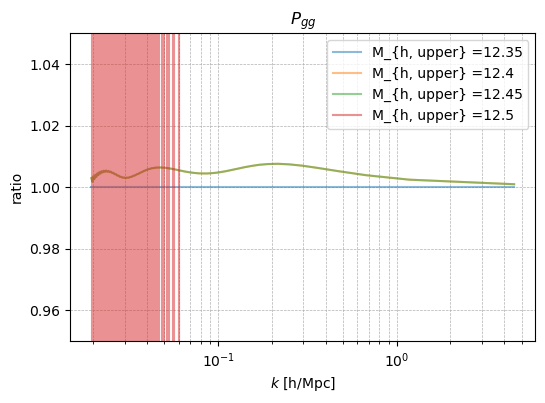

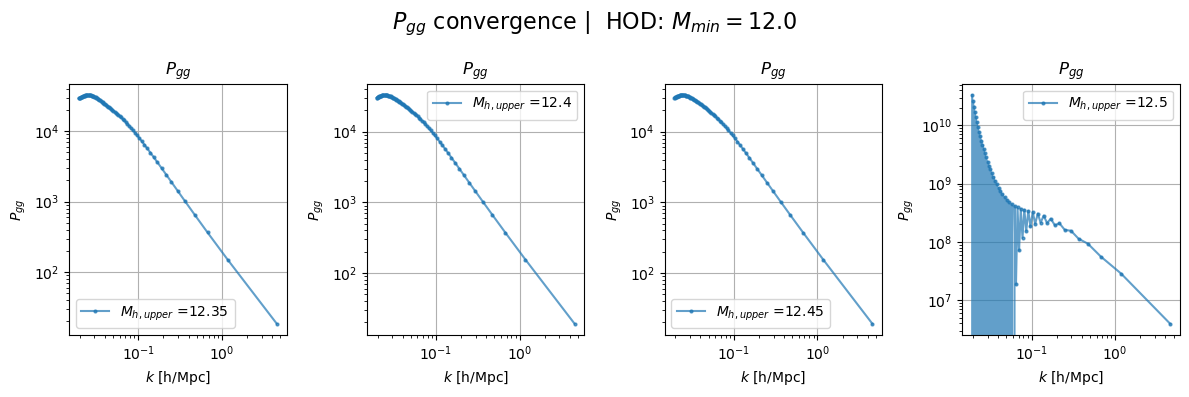

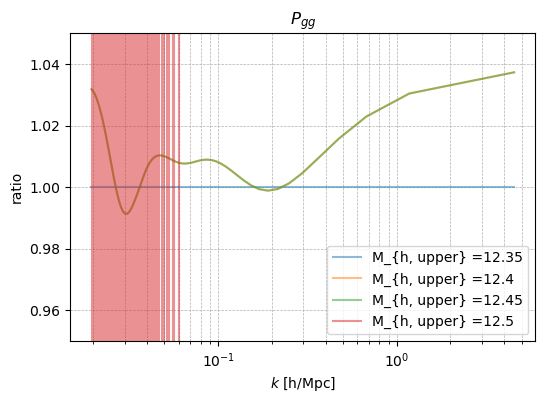

In [10]:
config = {'logMh': np.arange(11.0, 12.5, 0.05),
          'smooth_xihh_r': 0,
          'smooth_phh_k': 0,
          'smooth_xihh_mass': 0,
          'r_range': [0.1, 50]}
g.config = config
def pgg_conv_test_upper_mass(hod_Mmin=11.2):
    fig, ax = plt.subplots(1, 4, figsize=(12, 4))
    all_pggs= []
    for i, m_up in enumerate([12.35, 12.4, 12.45, 12.5]):
        g.config['logMh'] = np.arange(11.0, m_up, 0.05)
        hod_params = {
            # Central galaxy parameters
            'logMmin': hod_Mmin,
            'sig_logM': 0.1,
            #'alpha_inc': 0.5,
            #'Minc': 12.0,
            # Satellite galaxy parameters
            'M1': 12.5,
            'kappa': 1.1,
            'alpha': 2.0
            }
        g.reset_hod(hod_params)
        k, pgg_cc = g._pgg_2h_cc()
        all_pggs.append(pgg_cc)
        ax[i].plot(k, pgg_cc, marker='o', markersize=2, label=r'$M_{h, upper}$ ='+str(m_up), alpha=0.7)
        ax[i].set_title(r'$P_{gg}$')
        ax[i].set_xscale('log')
        ax[i].set_yscale('log')
        ax[i].grid()
        ax[i].set_ylabel(r'$P_{gg}$')
        ax[i].set_xlabel(r'$k$ [h/Mpc]')
        ax[i].legend()
    fig.suptitle(r'$P_{gg}$ convergence |  HOD: $M_{min}=$'+f'{hod_Mmin}', fontsize=16)
    fig.tight_layout()
    # plot the ratio
    fig_ratio, ax_ratio = plt.subplots(1, 1, figsize=(6, 4))
    for i, m_up in enumerate([12.35, 12.4, 12.45, 12.5]):
        ratio = all_pggs[i] / all_pggs[0]
        ax_ratio.plot(k, ratio, label=r'M_{h, upper} ='+str(m_up), alpha=0.5)
    ax_ratio.set_title(r'$P_{gg}$')
    ax_ratio.set_xscale('log')
    ax_ratio.grid()
    ax_ratio.set_ylabel('ratio')
    ax_ratio.set_xlabel(r'$k$ [h/Mpc]')
    ax_ratio.grid(which='both', linestyle='--', linewidth=0.5)
    ax_ratio.set_ylim(0.9, 1.1)
    ax_ratio.legend()
    ax_ratio.legend()
    ax_ratio.set_ylim(0.95, 1.05)
pgg_conv_test_upper_mass(hod_Mmin=11.2)
pgg_conv_test_upper_mass(hod_Mmin=11.6)
pgg_conv_test_upper_mass(hod_Mmin=12.0)

Use $dlogM = 0.1$:

In [12]:
import matplotlib.pyplot as plt
import importlib
import time
import numpy as np
from gal_goku import gal
importlib.reload(gal)

start_time = time.time()

config = {'logMh': np.arange(11.0, 12.5, 0.1),
          'smooth_xihh_r': 0,
          'smooth_phh_k': 0,
          'smooth_xihh_mass': 0,
          'r_range': [0.1, 50]}
g = gal.Gal(logging_level='DEBUG', config=config)
cosmo_test = g.xi_emu.cosmo_min + (g.xi_emu.cosmo_max - g.xi_emu.cosmo_min)/2
g.reset_hod()
g.reset_cosmo(cosmo_test)
end_time = time.time()
print(f"Execution time for one cosmology : {end_time - start_time:.4f} seconds")

Execution time for one cosmology : 13.0803 seconds


/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")


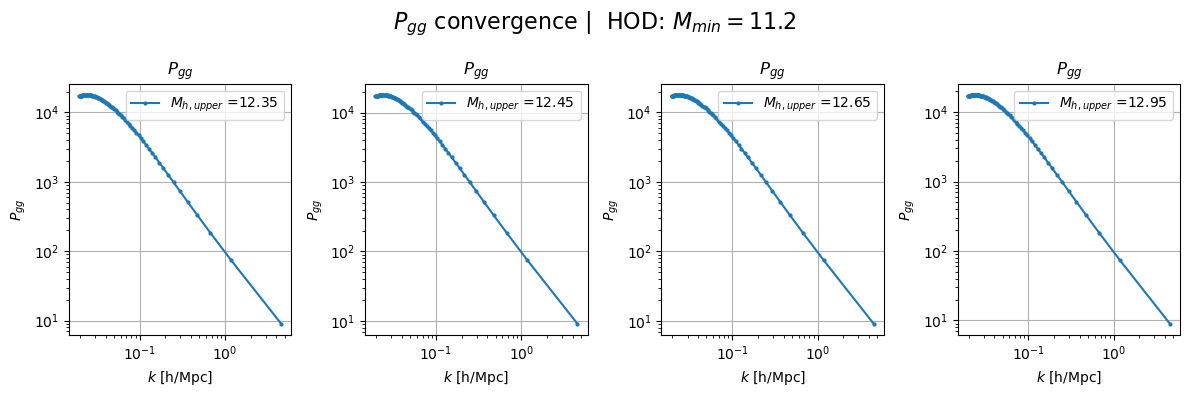

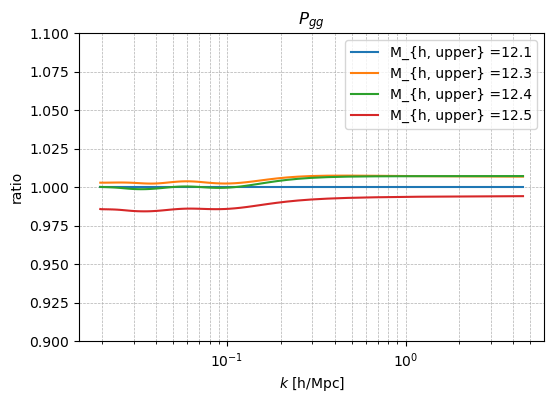

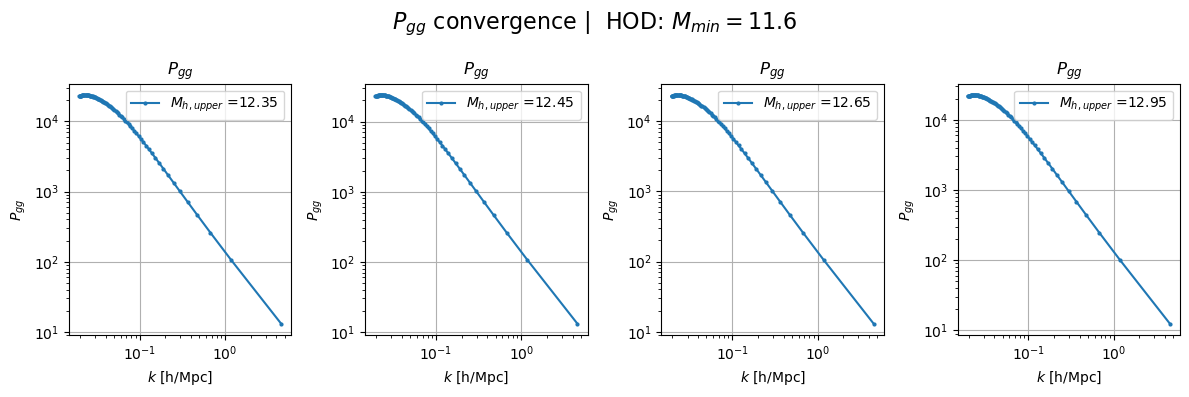

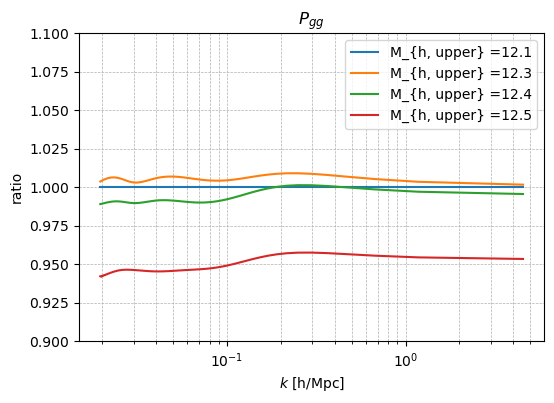

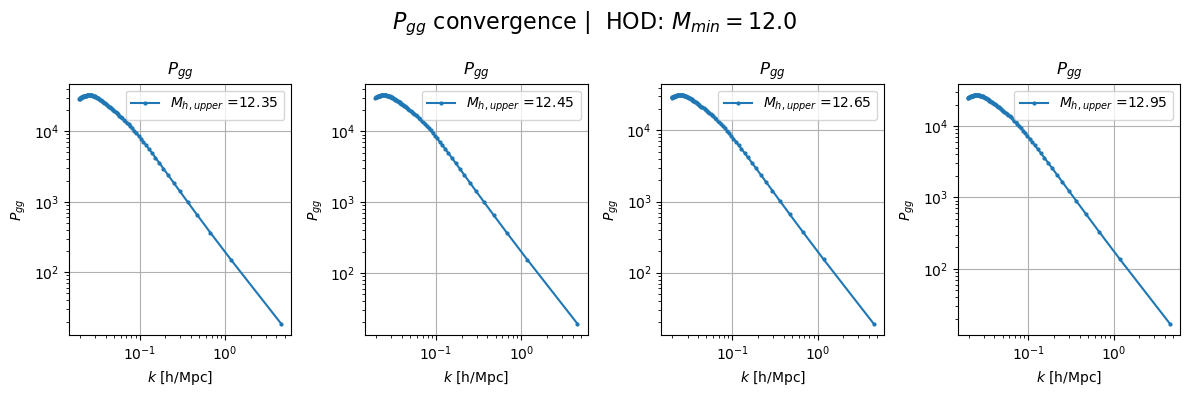

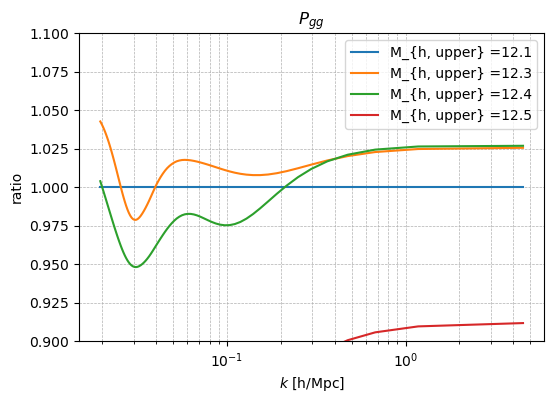

In [13]:
def pgg_conv_test_upper_mass(hod_Mmin=11.2):
    fig, ax = plt.subplots(1, 4, figsize=(12, 4))
    all_pggs= []
    for i, m_up in enumerate([12.35, 12.45, 12.65, 12.95]):
        g.config['logMh'] = np.arange(11.0, m_up, 0.1)
        hod_params = {
            # Central galaxy parameters
            'logMmin': hod_Mmin,
            'sig_logM': 0.1,
            #'alpha_inc': 0.5,
            #'Minc': 12.0,
            # Satellite galaxy parameters
            'M1': 12.5,
            'kappa': 1.1,
            'alpha': 2.0
            }
        g.reset_hod(hod_params)
        k, pgg_cc = g._pgg_2h_cc()
        all_pggs.append(pgg_cc)
        ax[i].plot(k, pgg_cc, marker='o', markersize=2, label=r'$M_{h, upper}$ ='+str(m_up))
        ax[i].set_title(r'$P_{gg}$')
        ax[i].set_xscale('log')
        ax[i].set_yscale('log')
        ax[i].grid()
        ax[i].set_ylabel(r'$P_{gg}$')
        ax[i].set_xlabel(r'$k$ [h/Mpc]')
        ax[i].legend()
    fig.suptitle(r'$P_{gg}$ convergence |  HOD: $M_{min}=$'+f'{hod_Mmin}', fontsize=16)
    fig.tight_layout()
    # plot the ratio
    fig_ratio, ax_ratio = plt.subplots(1, 1, figsize=(6, 4))
    for i, m_up in enumerate([12.1, 12.3, 12.4, 12.5]):
        ratio = all_pggs[i] / all_pggs[0]
        ax_ratio.plot(k, ratio, label=r'M_{h, upper} ='+str(m_up))
    ax_ratio.set_title(r'$P_{gg}$')
    ax_ratio.set_xscale('log')
    ax_ratio.grid()
    ax_ratio.set_ylabel('ratio')
    ax_ratio.set_xlabel(r'$k$ [h/Mpc]')
    ax_ratio.grid(which='both', linestyle='--', linewidth=0.5)
    ax_ratio.set_ylim(0.9, 1.1)
    ax_ratio.legend()
    ax_ratio.legend()
    ax_ratio.set_ylim(0.9, 1.1)
pgg_conv_test_upper_mass(hod_Mmin=11.2)
pgg_conv_test_upper_mass(hod_Mmin=11.6)
pgg_conv_test_upper_mass(hod_Mmin=12.0)

So, the $\textit{instablity in the P(k)}$ at high masses originates from the interpoaltion of $\xi_{hh}(r, M_1, M_2)$ in the $M_1$-$M_2$ plane.

Maybe I should train the emulators on a finer mass grid

Also check what Julian suggested: Frist take the FFTLog and then take the finite difference derivative.

## Response to cosmology: